The restoration of the playground or the construction of a shopping center.

Lanevskiy Timur.

11.05.2020

In [1]:
# python libraries

from geopy.geocoders import Nominatim
import requests
import json
import pandas as pd
import folium
from IPython.display import Image
from IPython.core.display import HTML

# Data acquisition and cleaning

Estimate the number of kindergartens in Shchelkovo, Moscow region, Russia

According to all-Russian statistics, 7582.4 thousand children are brought up in kindergartens, kindergartens - 47.8 thousand [**3**](https://rosinfostat.ru/uroven-obrazovaniya).

The number of Russians is 146880 thousand [**4**](https://rosinfostat.ru/rozhdaemost).

In [2]:
# number of children per thousand Russians

child = int(7582.4*1000/146880)
child

51

In [3]:
# number of children in one kindergarten

kindgard = int(7582.4/47.8)
kindgard

158

In [4]:
# function for requesting the number of children in the city

def ch_sum(child, townspeople):
    
    return int(child*townspeople/1000)

### 1.1 The number of townspeople in Shchelkovo is 126109 [**[5]**](https://ru.wikipedia.org/wiki/Щёлково)

In [5]:
# number of children in Shchelkovo

town_sum_shch = 126109
ch_sum_shch = ch_sum(child, town_sum_shch)
ch_sum_shch

6431

According to the Decree [**[6]**](http://mtsk.mos.ru/Handlers/Files.ashx/Download?ID=11293), the number of places in a kindergarten ranges from 150 to 350, depending on the conditions of the location and construction of the kindergarten. For Shchelkovo, we will take an average of 250 children in one kindergarten.

In [6]:
# Ожидаемое количество детских садов в Щелково

kind_shch = int(ch_sum_shch/250)
kind_shch

25

Taking into account the birth rate typical for Moscow cities, the search results for more than 25 kindergartens are expected.
I'll do a search.

In [7]:
# Функция запроса координат города

def geo_func(name):
    
    geolocator = Nominatim(user_agent="explorer")
    location = geolocator.geocode(name)
    lat_base = location.latitude
    lng_base = location.longitude
    
    return lat_base, lng_base
    

In [8]:
# coordinates of Shchelkovo, Moscow region, Russia

lat_shch = geo_func('Щелково, Россия')[0]
lng_shch = geo_func('Щелково, Россия')[1]
print('The geograpical coordinate of Shchelkovo are {}, {}.'.format(lat_shch, lng_shch))

The geograpical coordinate of Shchelkovo are 55.9206499, 37.9915576.


### 1.1.a Request for kindergartens in Shchelkovo

In [194]:
# data to request in Foursquare
# enter your client id and client secret

CLIENT_ID = 'your_ID'
CLIENT_SECRET = 'your_secret'
VERSION = '20180605'
radius = 5000
LIMIT = 100
search_query = 'детский,+сад'
intent = 'город Щелково'
categories = '4f4533814b9074f6e4fb0107' # категория Nursery School

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&checkin={}&categoryId={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_shch, lng_shch, intent, categories, VERSION, search_query, radius, LIMIT)
print('The search URL:', url)

The search URL: https://api.foursquare.com/v2/venues/search?client_id=your_ID&client_secret=your_secret&ll=55.9206499,37.9915576&checkin=город Щелково&categoryId=4f4533814b9074f6e4fb0107&v=20180605&query=детский,+сад&radius=5000&limit=100


In [10]:
# request to Foursquare

results_foursq = requests.get(url).json()
# results_foursq

In [11]:
# creating a data table with empty cells

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df = pd.DataFrame(columns=col)

In [12]:
# data received in Foursquare

for data in results_foursq['response']['venues']:
    name = data['name']
    address = data['location']['formattedAddress']
    latitude = data['location']['lat']
    longitude = data['location']['lng']
    class_ = data['categories'][0]['name']  
    
    df = df.append({'Name': name, 
                    'Address': address,
                    'Latitude': latitude,
                    'Longitude': longitude,
                    'Class': class_}, ignore_index=True)
print(df.shape)
df

(29, 5)


Name  \
0      Детский сад №18 «Росинка»   
1      Детский сад №65 «Радость»   
2     Детский сад №66 «Яблонька»   
3                 Детский сад №5   
4       Детский сад №14 «Крепыш»   
5       Детский сад №9 «Малинка»   
6      Детский сад №13 «Тополёк»   
7                Детский сад №20   
8        Детский сад #63 "Лучик"   
9    Детский сад №58 «Жемчужина»   
10      Детский Сад 30 "Ладушки"   
11          Детский сад "Пчелка"   
12             кроха детский сад   
13                 Детский сад 4   
14       Детский сад "Чебурашка"   
15         Детский сад "Колобок"   
16                Детский сад 12   
17          Детский Сад Родничок   
18               Детский Сад N12   
19                 детский сад 1   
20         Витаминка детский сад   
21                 Детский Садик   
22   Детский центр Солнечный кот   
23     Детский cад «Колокольчик»   
24      Детский Клуб "звездочка"   
25        Детский центр "Знайка"   
26                Д/С "Родничек"   
27  Мамина радость, детский клуб   
28                     Светлячок   

                                              Address   Latitude  Longitude  \
0                [Советская ул., 56, Щёлково, Россия]  55.921191  37.994548   
1                 [ул. Комарова, 20, Щёлково, Россия]  55.916356  37.987394   
2            [Комсомольская ул., 4а, Щёлково, Россия]  55.928278  37.991171   
3                [Сиреневая ул., 18, Щёлково, Россия]  55.931674  37.991141   
4          [Космодемьянская ул., 24, Щёлково, Россия]  55.930099  38.001752   
5                  [ул. Пушкина, 9а, Щёлково, Россия]  55.921728  37.980009   
6                                   [Щёлково, Россия]  55.920669  38.013396   
7                 [ул. 8 Марта, 20а, Щёлково, Россия]  55.907061  37.986704   
8                                            [Россия]  55.926061  37.996727   
9                 [Заречная ул., 5А, Щёлково, Россия]  55.926195  38.007009   
10                                           [Россия]  55.903350  37.984533   
11         [Щелково, Мик-он Финский, Щёлково, Россия]  55.936802  37.971053   
12                                           [Россия]  55.900230  38.018013   
13              [Улица Советская 9а, Фрязино, Россия]  55.952624  38.044086   
14                                           [Россия]  55.954756  38.050409   
15                                           [Россия]  55.957226  38.052316   
16               [Проспект Мира 25а, Фрязино, Россия]  55.952161  38.060677   
17                                           [Россия]  55.969577  37.966988   
18                                           [Россия]  55.956828  38.060830   
19                                           [Россия]  55.959154  38.052503   
20                       [Лесная, 4, Фрязино, Россия]  55.955026  38.041020   
21                                           [Россия]  55.969518  37.967278   
22             [Советская 1, 141100, Щёлково, Россия]  55.923124  37.988812   
23             [ул. Циолковского, 5, Щёлково, Россия]  55.904233  38.056039   
24                                           [Россия]  55.916017  37.992477   
25            [у. Сиреневая д.9 к.1, Щёлково, Россия]  55.928633  37.987157   
26                                           [Россия]  55.936924  37.932221   
27    [микрорайон Богородский, д.17, Щёлково, Россия]  55.940506  37.980863   
28  [Трудовая, 20 (Новосёлки-Слободка), 141281, Ив...  55.966533  37.941949   

             Class  
0   Nursery School  
1   Nursery School  
2   Nursery School  
3   Nursery School  
4   Nursery School  
5   Nursery School  
6   Nursery School  
7   Nursery School  
8   Nursery School  
9   Nursery School  
10  Nursery School  
11  Nursery School  
12  Nursery School  
13  Nursery School  
14  Nursery School  
15  Nursery School  
16  Nursery School  
17  Nursery School  
18  Nursery School  
19  Nursery School  
20  Nursery School  
21  Nursery School  
22  Nursery School  
23  Nursery School  
24  Nursery School  
25  Nursery School  
26  Nurse

I will display the coordinates of kindergartens received on the map. Geojson map of Shchelkovo created in the program [**[10]**](http://geojson.io).

In [13]:
# function for requesting a city map with markers

def map_func(lat_city, lng_city, map_json, data, color_mark):
    
    zoom = 12
    
    map_kind = folium.Map(location=[lat_city, lng_city], zoom_start=zoom)

    map_kind.choropleth(
        geo_data=map_json,        
        fill_color='green', 
        fill_opacity=0.5, 
        line_opacity=0.2,)


    for lat, lng in zip(data['Latitude'], data['Longitude']):
        label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color_mark,
            fill=True,
            fill_color=color_mark,
            fill_opacity=0.2,
            parse_html=False).add_to(map_kind)
        
    return map_kind

In [14]:
# map of Shchelkovo. The territory of the city is shown in green
# Cyrillic characters are not displayed on the map, and character encoding failed
# names of kindergartens in Cyrillic are excluded from pop-UPS

map_json = r'5_map_Shchelkovo.geojson'
color_mark='blue'

map_func(lat_shch, lng_shch, map_json, df, color_mark)

In [15]:
# deleting data from the table of kindergartens that go beyond the borders of the city of Shchelkovo

df = df[df['Latitude'] < 55.941].reset_index(drop = True)
df = df[df['Longitude'] > 37.98].reset_index(drop = True)
df = df[df['Latitude'].round(6) != 55.936924].reset_index(drop = True)
df = df[df['Latitude'].round(6) != 55.900230].reset_index(drop = True)

print(df.shape)
df

(16, 5)


Name  \
0      Детский сад №18 «Росинка»   
1      Детский сад №65 «Радость»   
2     Детский сад №66 «Яблонька»   
3                 Детский сад №5   
4       Детский сад №14 «Крепыш»   
5       Детский сад №9 «Малинка»   
6      Детский сад №13 «Тополёк»   
7                Детский сад №20   
8        Детский сад #63 "Лучик"   
9    Детский сад №58 «Жемчужина»   
10      Детский Сад 30 "Ладушки"   
11   Детский центр Солнечный кот   
12     Детский cад «Колокольчик»   
13      Детский Клуб "звездочка"   
14        Детский центр "Знайка"   
15  Мамина радость, детский клуб   

                                            Address   Latitude  Longitude  \
0              [Советская ул., 56, Щёлково, Россия]  55.921191  37.994548   
1               [ул. Комарова, 20, Щёлково, Россия]  55.916356  37.987394   
2          [Комсомольская ул., 4а, Щёлково, Россия]  55.928278  37.991171   
3              [Сиреневая ул., 18, Щёлково, Россия]  55.931674  37.991141   
4        [Космодемьянская ул., 24, Щёлково, Россия]  55.930099  38.001752   
5                [ул. Пушкина, 9а, Щёлково, Россия]  55.921728  37.980009   
6                                 [Щёлково, Россия]  55.920669  38.013396   
7               [ул. 8 Марта, 20а, Щёлково, Россия]  55.907061  37.986704   
8                                          [Россия]  55.926061  37.996727   
9               [Заречная ул., 5А, Щёлково, Россия]  55.926195  38.007009   
10                                         [Россия]  55.903350  37.984533   
11           [Советская 1, 141100, Щёлково, Россия]  55.923124  37.988812   
12           [ул. Циолковского, 5, Щёлково, Россия]  55.904233  38.056039   
13                                         [Россия]  55.916017  37.992477   
14          [у. Сиреневая д.9 к.1, Щёлково, Россия]  55.928633  37.987157   
15  [микрорайон Богородский, д.17, Щёлково, Россия]  55.940506  37.980863   

             Class  
0   Nursery School  
1   Nursery School  
2   Nursery School  
3   Nursery School  
4   Nursery School  
5   Nursery School  
6   Nursery School  
7   Nursery School  
8   Nursery School  
9   Nursery School  
10  Nursery School  
11  Nursery School  
12  Nursery School  
13  Nursery School  
14  Nursery School  
15  Nursery School

In [16]:
# checking the location of kindergartens

map_json = r'5_map_Shchelkovo.geojson'
color_mark='blue'

map_func(lat_shch, lng_shch, map_json, df, color_mark)

The 16 kindergartens found by Foursquare are significantly less than the expected 25. 

I will conduct an additional search for kindergartens in Shchelkovo using the Yandex search engine [**[9]**](https://yandex.ru/maps/10765/shelkovo/search/детские%20сады/?from=tabbar&ll=38.012825%2C55.920129&sctx=ZAAAAAgBEAAaKAoSCa2%2BuipQ%2B0JAEeShEH1O4ktAEhIJa%2B%2Fh%2F3%2BN%2Fz8RXKR4cMro5D8iBQABAgQFKAowADjx592Zpoel6uMBQI1USAFVzczMPlgAagJydXAAnQHNzEw9oAEAqAEAvQFcGaTFwgGBAbnAyb4E8Ij6kQSl35a%2FBp%2BLi8AEiL2t7AP%2FrPvfA8XX4PoDrKTnjwTpjYLTyAHo%2Fa%2B5BLuP9L9c143inATJgLL0A4654LjYBaLrtJwEgevDjwSLtZbiA%2BbZveID2OnItgSA6MLdA9PHo48G6%2Baj%2FASAh7PL7gKYi670A5Wpn%2BuNAg%3D%3D&sll=38.012825%2C55.920129&source=serp_navig&sspn=0.141580%2C0.046727&z=13.8).


![title](5_Щелково_дс.JPG)

Grey markers show kindergartens. When the map is enlarged, there are even more of them. 

I will supplement the data table with the found values.

In [17]:
# Yandex search

res_kind = requests.get('https://search-maps.yandex.ru/v1/?text=город Щелково,+детский сад&lang=ru_RU&bbox=37.958759,55.900076~38.06053,55.944572&rspn=1&apikey=your_apikey&results=500').json()
#res_kind

In [18]:
# creating a data table with empty cells

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_kind = pd.DataFrame(columns=col)

In [19]:
# function for filling in the kindergarten data table

def df_kind_func(df_kind):
    for data in res_kind['features']:
        name = data['properties']['name']
        address = data['properties']['description']
        latitude = data['geometry']['coordinates'][1]
        longitude = data['geometry']['coordinates'][0]
        class_=data['properties']['CompanyMetaData']['Categories'][0]['class']
    
        df_kind = df_kind.append({'Name': name,
                    'Address': address,
                    'Latitude': latitude,
                    'Longitude': longitude,
                    'Class': class_}, ignore_index=True)
    
    return df_kind

In [20]:
# the data obtained in Yandex

df_kind = df_kind_func(df_kind)
print(df_kind.shape)
df_kind

(48, 5)


Name  \
0                  МБДОУ ЦРР детский сад № 65 Радость   
1   МАДОУ детский сад № 57 Светлячок общеразвивающ...   
2                              Детский сад № 63 Лучик   
3                          Детский сад № 20 Щелкунчик   
4                    МАДОУ детский сад № 2 Карамелька   
5             Детский сад № 59 Золотая рыбка Корпус 2   
6   МАДОУ детский сад № 25 Малыш комбинированного ...   
7   МБДОУ центр развития ребенка - детский сад № 1...   
8                    Детский сад № 25 Малыш, корпус 1   
9                МАДОУ детский сад № 60 Пчёлка ЩМР МО   
10  МБДОУ детский сад № 64 Малышок общеразвивающег...   
11     Детский сад № 16 Солнышко компенсирующего вида   
12                                          Жемчужина   
13                            Детский сад № 23 Радуга   
14                           Детский сад № 30 Ладушки   
15  МАДОУ детский сад № 57 Светлячок общеразвивающ...   
16        МАДОУ детский сад № 59 Золотая рыбка ЩМР МО   
17         МАДОУ ЦРР-Детский сад № 66 Яблонька ЩМР МО   
18                                            Росинка   
19                          Детский сад № 12 Солнышко   
20                                    Детский сад № 5   
21                           Детский сад № 64 Малышок   
22                          Детский сад № 19 Родничок   
23                                  Цветик-Семицветик   
24  МАДОУ детский сад № 55 Сказка Комбинированного...   
25                                          Паровозик   
26  МБДОУ детский сад № 27 Березка общеразвивающег...   
27                                           Филиппок   
28                   Детский сад № 9 Малинка корпус 2   
29                              МБДОУ детский сад № 9   
30                       Детский сад № 15 Колокольчик   
31                         Детский сад-центр Алёнушка   
32            МБДОУ детский сад № 32 Росинка корпус 2   
33             Домашний детский сад Цветик-семицветик   
34                                   Детский сад № 63   
35                                           Филиппок   
36                                             Индиго   
37                                             Знайка   
38                                          Бэби-клуб   
39                           Детский сад Mini Bambini   
40                                          Бэби-клуб   
41                               Детский центр Катюша   
42                                  Оранжевое детство   
43                                   Гармония детства   
44                                             Сказка   
45                                  Оранжевое детство   
46                    Детская академия развития Сфера   
47                                     Детская страна   

                                              Address   Latitude  Longitude  \
0                   ул. Комарова, 20, Щёлково, Россия  55.915803  37.987027   
1                     ул. Зубеева, 2, Щёлково, Россия  55.920283  37.983003   
2            Космодемьянская ул., 7А, Щёлково, Россия  55.926589  37.997139   
3                   ул. 8 Марта, 20А, Щёлково, Россия  55.907217  37.987015   
4          4, микрорайон Богородский, Щёлково, Россия  55.938032  37.977114   
5            Космодемьянская ул., 24, Щёлково, Россия  55.932242  38.001112   
6                   Парковая ул., 9Б, Щёлково, Россия  55.919760  37.987155   
7               ул. Новая Фабрика, 1, Щёлково, Россия  55.921165  38.013905   
8                   Парковая ул., 1А, Щёлково, Россия  55.919331  37.990542   
9              5, микрорайон Финский, Щёлково, Россия  55.937583  37.971341   
10                Чкаловская ул., 6Б, Щёлково, Россия  55.905474  38.044035   
11  ул. Циолковского, 4А, микрорайон Щёлково-3, Щё...  55.907579  38.056397   
12                Заречная ул., вл5А, Щёлково, Россия  55.926015  38.007359   
13              Первомайская ул., 12, Щёлково, Россия  55.919170  37.976915   
14              Московская ул., 134В, Щёлково, Россия  55.903447  37.9

In [21]:
# adjusting the Yandex data table and saving it with a unique name

df_kind_shch = df_kind[df_kind['Class'] == 'kindergarten'].reset_index(drop = True)
print(df_kind_shch.shape)
df_kind_shch

(47, 5)


Name  \
0                  МБДОУ ЦРР детский сад № 65 Радость   
1   МАДОУ детский сад № 57 Светлячок общеразвивающ...   
2                              Детский сад № 63 Лучик   
3                          Детский сад № 20 Щелкунчик   
4                    МАДОУ детский сад № 2 Карамелька   
5             Детский сад № 59 Золотая рыбка Корпус 2   
6   МАДОУ детский сад № 25 Малыш комбинированного ...   
7   МБДОУ центр развития ребенка - детский сад № 1...   
8                    Детский сад № 25 Малыш, корпус 1   
9                МАДОУ детский сад № 60 Пчёлка ЩМР МО   
10  МБДОУ детский сад № 64 Малышок общеразвивающег...   
11     Детский сад № 16 Солнышко компенсирующего вида   
12                                          Жемчужина   
13                            Детский сад № 23 Радуга   
14                           Детский сад № 30 Ладушки   
15  МАДОУ детский сад № 57 Светлячок общеразвивающ...   
16        МАДОУ детский сад № 59 Золотая рыбка ЩМР МО   
17         МАДОУ ЦРР-Детский сад № 66 Яблонька ЩМР МО   
18                                            Росинка   
19                          Детский сад № 12 Солнышко   
20                                    Детский сад № 5   
21                           Детский сад № 64 Малышок   
22                          Детский сад № 19 Родничок   
23                                  Цветик-Семицветик   
24  МАДОУ детский сад № 55 Сказка Комбинированного...   
25                                          Паровозик   
26  МБДОУ детский сад № 27 Березка общеразвивающег...   
27                                           Филиппок   
28                   Детский сад № 9 Малинка корпус 2   
29                              МБДОУ детский сад № 9   
30                       Детский сад № 15 Колокольчик   
31                         Детский сад-центр Алёнушка   
32            МБДОУ детский сад № 32 Росинка корпус 2   
33             Домашний детский сад Цветик-семицветик   
34                                   Детский сад № 63   
35                                           Филиппок   
36                                             Индиго   
37                                             Знайка   
38                                          Бэби-клуб   
39                           Детский сад Mini Bambini   
40                                          Бэби-клуб   
41                               Детский центр Катюша   
42                                  Оранжевое детство   
43                                   Гармония детства   
44                                             Сказка   
45                    Детская академия развития Сфера   
46                                     Детская страна   

                                              Address   Latitude  Longitude  \
0                   ул. Комарова, 20, Щёлково, Россия  55.915803  37.987027   
1                     ул. Зубеева, 2, Щёлково, Россия  55.920283  37.983003   
2            Космодемьянская ул., 7А, Щёлково, Россия  55.926589  37.997139   
3                   ул. 8 Марта, 20А, Щёлково, Россия  55.907217  37.987015   
4          4, микрорайон Богородский, Щёлково, Россия  55.938032  37.977114   
5            Космодемьянская ул., 24, Щёлково, Россия  55.932242  38.001112   
6                   Парковая ул., 9Б, Щёлково, Россия  55.919760  37.987155   
7               ул. Новая Фабрика, 1, Щёлково, Россия  55.921165  38.013905   
8                   Парковая ул., 1А, Щёлково, Россия  55.919331  37.990542   
9              5, микрорайон Финский, Щёлково, Россия  55.937583  37.971341   
10                Чкаловская ул., 6Б, Щёлково, Россия  55.905474  38.044035   
11  ул. Циолковского, 4А, микрорайон Щёлково-3, Щё...  55.907579  38.056397   
12                Заречная ул., вл5А, Щёлково, Россия  55.926015  38.007359   
13              Первомайская ул., 12, Щёлково, Россия  55.919170  37.976915   
14              Московская ул., 134В, Щёлково, Россия  55.903447  37.984701   
15                  Парковая ул., 13, Щёлково, Р

In [22]:
df_kind_shch.to_csv('report_example.csv', sep = ',', encoding ='cp1251')

Compare the tables obtained in Foursquare and Yandex. They have duplicate values with different record formats.

I will accept Yandex data. They include private kindergartens and child development centers in addition to public ones.

The number of kindergartens 47 significantly exceeds the expected number of 25.

In [23]:
# control check of the location of kindergartens in Shchelkovo

map_json = r'5_map_Shchelkovo.geojson'
color_mark='blue'

map_kind_shch = map_func(lat_shch, lng_shch, map_json, df_kind_shch, color_mark)
display(map_kind_shch)

In [24]:
# number of children per kindergarten

ch_num_shch = int(ch_sum_shch/df_kind_shch.shape[0])
ch_num_shch

136

### 1.1.b Request for playgrounds in Shchelkovo

In [25]:
# Yandex search

res_chpl = requests.get('https://search-maps.yandex.ru/v1/?text=город Щелково,+детская игровая площадка&lang=ru_Ru&bbox=37.958759,55.900076~38.06053,55.944572&rspn=1&apikey=your_apikey&results=500').json()
#res_chpl

In [26]:
# creating a data table with empty cells

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_chpl = pd.DataFrame(columns=col)

In [27]:
# function for filling in the playground data table

def df_chpl_func(df_chpl):
    for data in res_chpl['features']: # обработка результатов results_ya
        name = data['properties']['name']
        address = data['properties']['description']
        latitude = data['geometry']['coordinates'][1]
        longitude = data['geometry']['coordinates'][0]
        class_ = data['properties']['CompanyMetaData']['Categories'][0]['class']
                      
        df_chpl = df_chpl.append({'Name': name,
                    'Address': address,
                    'Latitude': latitude,
                    'Longitude': longitude,
                    'Class': class_}, ignore_index=True)
    
    return df_chpl

In [28]:
# the data obtained in Yandex

df_chpl = df_chpl_func(df_chpl)
print(df_chpl.shape)
df_chpl

(20, 5)


Name  \
0                        Замок чудес   
1   Детская игровая комната Непоседы   
2                           Апельсин   
3                       Кот да Винчи   
4                             ЗооЗаО   
5                           Маф Дефо   
6    Детские игровые залы и площадки   
7    Детские игровые залы и площадки   
8                         Туто-Круто   
9    Детские игровые залы и площадки   
10                            Сказка   
11   Детские игровые залы и площадки   
12                             Малыш   
13           Площадки для игры в ПДД   
14                         Ладошкино   
15                         ХоббиХолл   
16                        Хеппи Кидс   
17   Детские игровые залы и площадки   
18   Детские игровые залы и площадки   
19                            Бибика   

                                              Address   Latitude  Longitude  \
0                      ул. Шмидта, 9, Щёлково, Россия  55.923846  37.984440   
1                    Свирская ул., 2, Щёлково, Россия  55.915291  38.001620   
2             1-й Советский пер., 25, Щёлково, Россия  55.919559  38.008995   
3                 Талсинская ул., 6А, Щёлково, Россия  55.927079  37.990382   
4                   Фабричная ул., 1, Щёлково, Россия  55.916623  38.010253   
5                   Заводская ул., 1, Щёлково, Россия  55.910321  38.014628   
6   Россия, Московская область, Щёлково, Щёлковски...  55.917051  37.989037   
7   Россия, Московская область, Щёлково, микрорайо...  55.940560  37.980054   
8                  Советская ул., 16, Щёлково, Россия  55.912940  37.994485   
9                 Чкаловская ул., 8А, Щёлково, Россия  55.905799  38.045340   
10  Россия, Московская область, Щёлково, Щелковски...  55.924450  37.972423   
11  Россия, Московская область, Щёлково, микрорайо...  55.905905  37.982658   
12  Россия, Московская область, Щёлково, микрорайо...  55.910358  38.059013   
13  Россия, Московская область, Щёлково, Щелковски...  55.923574  37.975040   
14          Краснознаменская ул., 15, Щёлково, Россия  55.915379  38.002821   
15                  ул. Неделина, 2А, Щёлково, Россия  55.943258  37.974578   
16  Россия, Московская область, городской округ Мы...  55.924240  37.973174   
17  Россия, Московская область, Щёлково, улица Нов...  55.920065  38.012102   
18                Московская ул., 68, Щёлково, Россия  55.900471  37.982809   
19         1, микрорайон Богородский, Щёлково, Россия  55.936776  37.976656   

                   Class  
0      fallback services  
1      fallback services  
2      fallback services  
3            restaurants  
4      fallback services  
5      fallback services  
6   childrens playground  
7   childrens playground  
8   childrens playground  
9   childrens playground  
10  childrens playground  
11  childrens playground  
12  childrens playground  
13  childrens playground  
14  childrens playground  
15  childrens playground  
16            attraction  
17  childrens playground  
18  childrens playground  
19  childrens playground

In [29]:
# adjusting the Yandex data table and saving it with a unique name

df_chpl_shch = df_chpl[df_chpl['Class'] == 'childrens playground'].reset_index(drop = True)
print(df_chpl_shch.shape)

(13, 5)


In [30]:
# control check of the location of playgrounds in Shchelkovo

map_json = r'5_map_Shchelkovo.geojson'
color_mark='yellow'

map_chpl_shch = map_func(lat_shch, lng_shch, map_json, df_chpl_shch, color_mark)
display(map_chpl_shch)

In [31]:
# number of children per playground

ch_per_chpl_shch = int(ch_sum_shch/df_chpl_shch.shape[0])
ch_per_chpl_shch

494

### 1.1.c Request for shopping center in Shchelkovo

In [195]:
# data for a request to Foursquare shopping center

CLIENT_ID = 'your_ID'
CLIENT_SECRET = 'your_secret'
VERSION = '20180605'
radius = 3000
LIMIT = 100
query = 'торговый_центр'
intent = 'Щелково'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&intent={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_shch, lng_shch, intent, VERSION, query, radius, LIMIT)

print('The search URL:', url)

The search URL: https://api.foursquare.com/v2/venues/search?client_id=your_ID&client_secret=your_secret&ll=55.9206499,37.9915576&intent=Щелково&v=20180605&query=торговый_центр&radius=3000&limit=100


In [33]:
# request a shopping center in Foursquare

res_foursq_shop = requests.get(url).json()
#res_foursq_shop

In [34]:
# creating a data table with empty cells

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_shop = pd.DataFrame(columns=col)

In [35]:
# data received in Foursquare

for data in res_foursq_shop['response']['venues']:
    name = data['name']
    address = data['location']['formattedAddress']
    latitude = data['location']['lat']
    longitude = data['location']['lng']
    class_ = data['categories'][0]['name']
    
    df_shop = df_shop.append({'Name': name, 
                    'Address': address,
                    'Latitude': latitude,
                    'Longitude': longitude,
                    'Class': class_}, ignore_index=True)
print(df_shop.shape)
df_shop

(50, 5)


Name  \
0                                           ТЦ «999!»   
1                                        ТЦ "Премьер"   
2              Олимп-Сити офисно-деловой бизнес-центр   
3             Единый Расчетный Кассовый Центр Щелково   
4                      Бизнес-центр на Площади Ленина   
5                      Щелковский Перинатальный Центр   
6                  Центр Красоты и Здоровья "Татьяна"   
7                        YES Центр иностранных языков   
8                                          БЦ "Искра"   
9                                            БЦ Карат   
10                        Детский центр Солнечный кот   
11                               Фитнес-центр "Зебра"   
12                                      Центральная 9   
13                            Центр развития Романтик   
14                                    Галерея Красоты   
15                                     Центральная 2а   
16                                    Центральная, 23   
17     Центр детского творчества на " На центральной"   
18  Остановка ул.Центральная, 21 (направление в це...   
19                               Центр Красоты "Бель"   
20               Doktor Smile стоматологический центр   
21                             Бизнес Центр "Капитал"   
22                                        ЦентроОбувь   
23                    Центральная районная библиотека   
24                                     Центральная,27   
25                       Психологический Центр Янтарь   
26                             Детский Центр Апельсин   
27                                LLC Business Center   
28                                      Центральная 3   
29                          Бизнес Центр "СпиртЗавод"   
30                                          SPA–центр   
31                             Детский центр "Знайка"   
32                                    Центральная, 17   
33                          Детский сад №65 «Радость»   
34               Щелковский центр занятости населения   
35                 Офисный центр "СпиртЗавод"Офис 208   
36                          Ветеринарный Центр "Ника"   
37                                         Мед. Центр   
38                                  Фитнес Центр Лето   
39                       Медицинский Центр Наш Доктор   
40                             Детский центр "Катюша"   
41                                  ГСК "Центральный"   
42                                  Центр "La Beaute"   
43                   Альтернатива, ветеринарный центр   
44              Юридический Центр Регистрации и Права   
45                 национальный диагностический центр   
46                               Детский центр "Сема"   
47                 Центр диагностики Томоград-Щелково   
48          ДОАО Центрэнергогаз ОАО Газпром В Щелково   
49  Центральная улица, 71/1 (Резиденция пана Дирек...   

                                              Address   Latitude  Longitude  \
0           [Пролетарский просп., 9, Щёлково, Россия]  55.919685  37.996095   
1   [ул. Центральная, 17 (ул. Зубеева), 141108, Щё...  55.918512  37.984307   
2                                            [Россия]  55.921032  37.990387   
3                                            [Россия]  55.919968  37.992635   
4                                   [Щёлково, Россия]  55.922111  37.992697   
5                           [141100, Щёлково, Россия]  55.921875  37.988560   
6                                            [Россия]  55.920338  37.988136   
7                                            [Россия]  55.922880  37.991590   
8          [пл. Ленина, д.5, 141100, Щёлково, Россия]  55.922655  37.991999   
9                                            [Россия]  55.922887  37.991993   
10             [Советская 1, 141100, Щёлково, Россия]  55.923124  37.988812   
11      [улица Талсинская 9, 141113, Щелково, Россия]  55.925923  37.992134   
12                                           [Россия]  55.917294  37.988563   
13                  [Пролетарский п

In [36]:
# location of shopping centers in Shchelkovo

map_json = r'5_map_Shchelkovo.geojson'
color_mark='red'

map_func(lat_shch, lng_shch, map_json, df_shop, color_mark)

The search query is unsuccessful, it contains a lot of unnecessary information.

In [37]:
# Yandex search

res_shop = requests.get('https://search-maps.yandex.ru/v1/?text=город Щелково,+торговый центр&lang=ru_Ru&bbox=37.958759,55.900076~38.06053,55.944572&rspn=1&apikey=your_apikey&results=500').json()
#res_shop

In [38]:
# creating a data table with empty cells

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_shop = pd.DataFrame(columns=col)

In [39]:
# function for filling in the shopping center data table

def df_shop_func(df_shop):
    
    for data in res_shop['features']:
        name = data['properties']['name']
        address = data['properties']['CompanyMetaData']['address']
        latitude = data['properties']['boundedBy'][0][1]
        longitude = data['properties']['boundedBy'][0][0]
        class_=data['properties']['CompanyMetaData']['Categories'][0]['class']
    
        df_shop = df_shop.append({'Name': name,
                    'Address': address,
                    'Latitude': latitude,
                    'Longitude': longitude,
                    'Class': class_}, ignore_index=True)
    
    return df_shop

In [40]:
# the data obtained in Yandex

df_shop = df_shop_func(df_shop)
print(df_shop.shape)
df_shop

(22, 5)


Name  \
0                          Щелково   
1                      Центральный   
2                            Ладья   
3                      Гранд Плаза   
4                             Фреш   
5                             999!   
6        Торговый комплекс Городок   
7                            Эрион   
8                          Премьер   
9            Торговые ряды Клязьма   
10                 Пассаж Заречный   
11                            Леда   
12                           Карат   
13  Торговая галерея на Чкаловской   
14                 ТЦ Альтернатива   
15                      ЕвроАльянс   
16                         Встреча   
17                       Сиреневый   
18                     На Парковой   
19                       Сиреневый   
20                          Триумф   
21                         Экватор   

                                              Address   Latitude  Longitude  \
0   Россия, Московская область, Щёлково, Пролетарс...  55.921579  37.997234   
1   Россия, Московская область, Щёлково, Талсинска...  55.922590  37.989938   
2   Россия, Московская область, Щёлково, Пролетарс...  55.914686  37.992894   
3   Россия, Московская область, Щёлково, Фряновско...  55.925833  38.004285   
4   Россия, Московская область, Щёлково, улица Пуш...  55.917248  37.969256   
5   Россия, Московская область, Щёлково, Пролетарс...  55.917616  37.992045   
6   Московская обл., г. Щёлково, ул. Браварская, д...  55.937199  37.966794   
7   Россия, Московская область, Щёлково, 1-й Совет...  55.917524  37.991490   
8   Россия, Московская область, Щёлково, Центральн...  55.916416  37.980453   
9   Россия, Московская область, Щёлково, Пролетарс...  55.918818  37.993485   
10  Россия, Московская область, Щёлково, Комсомоль...  55.926849  37.989608   
11  Россия, Московская область, Щёлково, микрорайо...  55.906716  38.052111   
12  Россия, Московская область, Щёлково, площадь Л...  55.920841  37.987909   
13  Россия, Московская область, Щёлково, Чкаловска...  55.902926  38.037789   
14  Россия, Московская область, Щёлково, Центральн...  55.916638  37.979634   
15  Россия, Московская область, Щёлково, микрорайо...  55.925173  37.979630   
16  Россия, Московская область, Щёлково, Талсинска...  55.923389  37.989652   
17  Россия, Московская область, Щёлково, Талсинска...  55.924899  37.981845   
18  Россия, Московская область, Щёлково, Парковая ...  55.918234  37.983565   
19  Россия, Московская область, Щёлково, Сиреневая...  55.926586  37.983235   
20  Россия, Московская область, Щёлково, Пролетарс...  55.914067  37.992658   
21  Россия, Московская область, Щёлково, Талсинска...  55.923431  37.991851   

    Class  
0   malls  
1   malls  
2   malls  
3   malls  
4   malls  
5   malls  
6   malls  
7   malls  
8   malls  
9   malls  
10  malls  
11  malls  
12  malls  
13  malls  
14  malls  
15  malls  
16  malls  
17  malls  
18  malls  
19  malls  
20  malls  
21  malls

In [41]:
# checking the location of shopping centers in Shchelkovo

map_json = r'5_map_Shchelkovo.geojson'
color_mark_='red'

map_shop_shch = map_func(lat_shch, lng_shch, map_json, df_shop, color_mark)
display(map_shop_shch)

In [42]:
# adjusting the Yandex data table

df_shop = df_shop[df_shop['Class'] == 'malls'].reset_index(drop = True)
df_shop = df_shop[df_shop['Latitude'].round(6) != 55.917248].reset_index(drop = True)
df_shop = df_shop[df_shop['Latitude'].round(6) != 55.916638].reset_index(drop = True)
df_shop_shch = df_shop[df_shop['Latitude'].round(6) != 55.916416].reset_index(drop = True)
print(df_shop_shch.shape)

(19, 5)


In [43]:
# control check of the location of shopping centers in Shchelkovo

map_json = r'5_map_Shchelkovo.geojson'
color_mark='red'

map_shop_shch = map_func(lat_shch, lng_shch, map_json, df_shop, color_mark)
display(map_shop_shch)

In [44]:
# the number of citizens per shopping center

town_num_shch = int(town_sum_shch/df_shop_shch.shape[0])
town_num_shch

6637

### 1.1.d Final information about the city of Shchelkovo

In [45]:
# table of total data for the city of Shchelkovo

city_sum = pd.DataFrame({'Name' : ['Shchelkovo'],
                         'Townspeople' : [town_sum_shch],
                         'Children': [ch_sum_shch],
                         'Kindergarten': [df_kind_shch.shape[0]],
                         'Playground': [df_chpl_shch.shape[0]],
                         'Shopping center': [df_shop_shch.shape[0]],
                         'Сhildren per kindergarten': [ch_num_shch],
                         'Сhildren per playground': [ch_per_chpl_shch],
                         'Townspeople per shopping center': [town_num_shch]})
city_sum

Name  Townspeople  Children  Kindergarten  Playground  \
0  Shchelkovo       126109      6431            47          13   

   Shopping center  Сhildren per kindergarten  Сhildren per playground  \
0               19                        136                      494   

   Townspeople per shopping center  
0                             6637

In [46]:
# function for requesting a city map with markers for kindergartens, playgrounds and shopping centers

def map_sum_func(lat_city, lng_city, map_json, data_kind, data_chpl, data_shop):
    
    zoom = 12
    map_sum = folium.Map(location=[lat_city, lng_city], zoom_start=zoom)

    map_sum.choropleth(
        geo_data=map_json,        
        fill_color='green', 
        fill_opacity=0.5, 
        line_opacity=0.2,)


    for lat, lng in zip(data_kind['Latitude'], data_kind['Longitude']):
        label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.2,
            parse_html=False).add_to(map_sum)
        
    for lat, lng in zip(data_chpl['Latitude'], data_chpl['Longitude']):
        label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.2,
            parse_html=False).add_to(map_sum)    
        
    for lat, lng in zip(data_shop['Latitude'], data_shop['Longitude']):
        label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.2,
            parse_html=False).add_to(map_sum)  
        
    return map_sum

In [47]:
map_json = r'5_map_Shchelkovo.geojson'

map_sum_shch = map_sum_func(lat_shch, lng_shch, map_json, df_kind_shch, df_chpl_shch, df_shop_shch)
display(map_sum_shch)

I will consider the neighboring cities of Korolev, Mytishchi, Fryazino, Ivanteevka.

### 1.2 Korolyov

In [48]:
# collecting general information about the city of Korolev

city_name = 'Korolyov, Russia'

# number of townspeople
town_sum = 225858

# number of children
ch_sum = int(child*town_sum/1000)

# coordinates of the city
lat_city = geo_func(city_name)[0]
lng_city = geo_func(city_name)[1]

# expected number of kindergartens
kind = int(ch_sum/250)
    
print('The geograpical coordinate of {} are {}, {}.'.format(city_name.split()[0], lat_city, lng_city))
print()
print('Name:', city_name.split(',')[0]+',','Townspeople:', str(town_sum)+',','Children:', str(ch_sum)+',','Raschet_kindergarten:', str(kind))

The geograpical coordinate of Korolyov, are 55.912944749999994, 37.84616759542375.

Name: Korolyov, Townspeople: 225858, Children: 11518, Raschet_kindergarten: 46


### 1.2.a Request for kindergartens in Korolyov

In [49]:
# search query for kindergartens

res_kind = requests.get('https://search-maps.yandex.ru/v1/?text=город Королев,+детский сад&lang=ru_Ru&bbox=37.790916,55.901007~37.93698,55.959502&rspn=1&apikey=your_apikey&results=500').json()
#res_kind

In [50]:
# collecting data about kinderga

# table of data about kindergartens

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_kind = pd.DataFrame(columns=col)
df_kind = df_kind_func(df_kind)
display(df_kind)

# checking the location of kindergartens
map_json = r'5_map_Korolyov.geojson'
color_mark='blue'
map_kind_kor = map_func(lat_city, lng_city, map_json, df_kind, color_mark)
display(map_kind_kor)

Name  \
0                                      Солнечный город   
1                        МБДОУ детский сад № 2 Малышка   
2                            Детский сад № 20 Машенька   
3    МАДОУ городского округа Королёв Московской обл...   
4    Детский сад № 43 Комбинированного вида академи...   
..                                                 ...   
110                                   Березка, березка   
111                              Пеликен семейный клуб   
112                            Детский клуб Творчество   
113                                Детский центр Садко   
114                                       Детский клуб   

                                               Address   Latitude  Longitude  \
0                 Октябрьская ул., 9А, Королёв, Россия  55.920219  37.812447   
1                     Садовая ул., 5А, Королёв, Россия  55.928463  37.815412   
2                 просп. Королёва, 5Г, Королёв, Россия  55.922866  37.839689   
3    Советская ул., 15А, микрорайон Первомайский, К...  55.947224  37.871520   
4            ул. Марины Цветаевой, 10, Королёв, Россия  55.925158  37.860790   
..                                                 ...        ...        ...   
110  Россия, Московская область, Королёв, микрорайо...  55.945025  37.829081   
111       Пионерская ул., 30, корп. 6, Королёв, Россия  55.908434  37.829629   
112  Пушкинская ул., 13, микрорайон Юбилейный, Коро...  55.933719  37.844746   
113                 ул. Богомолова, 3, Королёв, Россия  55.916195  37.810639   
114  Лесная ул., 20, микрорайон Юбилейный, Королёв,...  55.934495  37.846723   

            Class  
0    kindergarten  
1    kindergarten  
2    kindergarten  
3    kindergarten  
4    kindergarten  
..            ...  
110  kindergarten  
111  kindergarten  
112  kindergarten  
113  kindergarten  
114  kindergarten  

[115 rows x 5 columns]

In [51]:
# adjusting the data table for kindergartens

df_kind = df_kind[df_kind['Class'] == 'kindergarten'].reset_index(drop = True)
df_kind = df_kind[df_kind['Latitude'].round(6) != 55.957468].reset_index(drop = True)
df_kind = df_kind[df_kind['Latitude'].round(6) != 55.926796].reset_index(drop = True)
df_kind_kor = df_kind[df_kind['Latitude'].round(6) != 55.928605].reset_index(drop = True)

print('Kindergarten:', str(df_kind_kor.shape[0])+',', 'Raschet_kindergarten:', str(kind))

Kindergarten: 102, Raschet_kindergarten: 46


In [52]:
# control check of the location of kindergartens in the city

map_json = r'5_map_Korolyov.geojson'
color_mark='blue'
map_kind_kor = map_func(lat_city, lng_city, map_json, df_kind_kor, color_mark)
display(map_kind_kor)

# number of children per kindergarten

ch_num_kor = int(ch_sum/df_kind_kor.shape[0])
print('Сhildren per kindergarten:', ch_num_kor)

Сhildren per kindergarten: 112


### 1.2.b Request for playground in Korolyov

In [53]:
# search query for playgrounds

res_chpl = requests.get('https://search-maps.yandex.ru/v1/?text=город Королев,+детская игровая площадка&lang=ru_Ru&bbox=37.790916,55.901007~37.93698,55.959502&rspn=1&apikey=your_apikey&results=500').json()
#res_chpl

In [54]:
# collecting data about playgrounds

# table of data about playgrounds

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_chpl = pd.DataFrame(columns=col)
df_chpl = df_chpl_func(df_chpl)
display(df_chpl)

# checking the location of playgrounds

map_json = r'5_map_Korolyov.geojson'
color_mark='yellow'
map_chpl_kor = map_func(lat_city, lng_city, map_json, df_chpl, color_mark)
display(map_chpl_kor)

Name  \
0                       Лофт Крылья   
1                       СК-керамика   
2                       Festen Halt   
3                          Непоседы   
4                           Ld Park   
..                              ...   
61  Детские игровые залы и площадки   
62  Детские игровые залы и площадки   
63  Детские игровые залы и площадки   
64  Детские игровые залы и площадки   
65  Детские игровые залы и площадки   

                                              Address   Latitude  Longitude  \
0         ул. Горького, 79, корп. 13, Королёв, Россия  55.918559  37.882200   
1   Комсомольская ул., 39, микрорайон Первомайский...  55.938516  37.858132   
2                просп. Королёва, 5Д, Королёв, Россия  55.921824  37.843795   
3   ул. Маяковского, 10А, микрорайон Болшево, Коро...  55.929757  37.842169   
4   Советская ул., 27, микрорайон Первомайский, Ко...  55.944129  37.869783   
..                                                ...        ...        ...   
61  Россия, Московская область, городской округ Щё...  55.937794  37.934919   
62  Россия, Московская область, Пушкинский городск...  55.953911  37.893263   
63  Россия, Московская область, Мытищи, микрорайон...  55.936531  37.801190   
64  Россия, Московская область, городской округ Щё...  55.915213  37.924372   
65  Россия, Московская область, Пушкинский городск...  55.955879  37.795989   

                   Class  
0      fallback services  
1           fallback fun  
2      fallback services  
3      fallback services  
4            hypermarket  
..                   ...  
61  childrens playground  
62  childrens playground  
63  childrens playground  
64  childrens playground  
65  childrens playground  

[66 rows x 5 columns]

In [55]:
# adjusting the data table for playgrounds

df_chpl = df_chpl[df_chpl['Class'] == 'childrens playground'].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.957798].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.953911].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.937686].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.937794].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.933091].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.932700].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.930452].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.921377].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.915213].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.907868].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.954428].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.955879].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.949400].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.946912].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.936531].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.929679].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.927561].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.925947].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.925492].reset_index(drop = True)
df_chpl_kor = df_chpl[df_chpl['Latitude'].round(6) != 55.928605].reset_index(drop = True)

In [56]:
# verification of the location of playgrounds in the city

map_json = r'5_map_Korolyov.geojson'
color_mark='yellow'
map_chpl_kor = map_func(lat_city, lng_city, map_json, df_chpl_kor, color_mark)
display(map_chpl_kor)

# number of children per playground

ch_per_chpl_kor = int(ch_sum/df_chpl_kor.shape[0])
print('Сhildren per playground:', ch_per_chpl_kor)

Сhildren per playground: 295


### 1.2.c Request for shopping center in Korolyov

In [57]:
# shopping center search query

res_shop = requests.get('https://search-maps.yandex.ru/v1/?text=город Королев,+торговый центр&lang=ru_Ru&bbox=37.790916,55.901007~37.93698,55.959502&rspn=1&apikey=your_apikey&results=500').json()
#res_shop

In [58]:
# collecting data about shopping centers

# table of data about shopping centers

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_shop = pd.DataFrame(columns=col)
df_shop = df_shop_func(df_shop)
display(df_shop)

# checking the location of shopping centers

map_json = r'5_map_Korolyov.geojson'
color_mark='red'
map_shop_kor = map_func(lat_city, lng_city, map_json, df_shop, color_mark)
display(map_shop_kor)

Name  \
0                 Торговый центр   
1                 Торговый центр   
2             Торговый центр № 1   
3                         Ковчег   
4                         Статус   
5                           Сити   
6                 Торговый центр   
7                    ТК Звёздный   
8                       Подлипки   
9                         Юпитер   
10                     Вертикаль   
11                Торговый центр   
12                Торговый центр   
13                        Зодиак   
14                       Престиж   
15                   Подмосковье   
16                       Луноход   
17                         Сигма   
18  Центр детских товаров Алёнка   
19                Торговый центр   
20                        Нептун   
21                      Садовник   
22                     Лесная 14   
23                Торговый центр   
24                         София   
25                Торговый центр   
26                        Каньон   
27                   Мегаполис 2   
28                       Подарки   
29                      Пирамида   
30           Сатурн-недвижимость   
31                        Каспий   
32                          Союз   
33                      ТД Виват   
34             Московские товары   
35    Торгово-офисный центр Маяк   
36                      Виктория   
37                   Лавка Вкуса   
38                      Лариса-С   
39                Торговый центр   
40                    Автострада   
41                Торговый центр   
42                    ТЦ Матрица   

                                              Address   Latitude  Longitude  \
0   Россия, Московская область, Королёв, микрорайо...  55.934899  37.835113   
1   Россия, Московская область, Королёв, микрорайо...  55.934835  37.837370   
2   Россия, Московская область, Королёв, проспект ...  55.914960  37.863070   
3   Россия, Московская область, Королёв, проспект ...  55.918236  37.833905   
4   Россия, Московская область, Королёв, проспект ...  55.919898  37.839641   
5   Россия, Московская область, Королёв, Пионерска...  55.911893  37.798738   
6   Россия, Московская область, Королёв, проспект ...  55.905657  37.861913   
7   Россия, Московская область, Королёв, проспект ...  55.904074  37.863755   
8   Россия, Московская область, Королёв, улица Фру...  55.921524  37.818220   
9   Россия, Московская область, Королёв, проспект ...  55.907031  37.861877   
10  Россия, Московская область, Королёв, микрорайо...  55.931292  37.839416   
11  Россия, Московская область, Королёв, проезд Ци...  55.920215  37.828407   
12  Россия, Московская область, Королёв, улица Гор...  55.913473  37.866088   
13  Россия, Московская область, Королёв, улица Иса...  55.922237  37.854380   
14  Россия, Московская область, Королёв, проспект ...  55.918169  37.863422   
15  Россия, Московская область, Королёв, Станционн...  55.925158  37.855249   
16  Россия, Московская область, Королёв, проспект ...  55.913630  37.864415   
17  Россия, Московская область, Королёв, улица Кал...  55.920220  37.810876   
18  Россия, Московская область, Королёв, улица Иса...  55.920320  37.863622   
19  Россия, Московская область, Королёв, микрорайо...  55.934824  37.849536   
20  Россия, Московская область, Королёв, улица Орд...  55.903904  37.847067   
21  Россия, Московская область, Королёв, проспект ...  55.918563  37.838285   
22  Россия, Московская область, Королёв, микрорайо...  55.932367  37.840305   
23  Россия, Московская область, Королёв, микрорайо...  55.929598  37.836807   
24  Россия, Московская область, Королёв, Октябрьск...  55.914555  37.839011   
25  Россия, Московская область, Королёв, микрорайо...  55.927054  37.847297   
26  Россия, Московская область, Королёв, улица Гра...  55.923502  37.816056   
27  Россия, Московская область, Королёв, улица 50-...  55.918446  37.840488   
28  Россия, Московская область, Королёв, проспект ...  55.918375  37.836171   
29  Россия, Московская область, Королёв, Вокзальны...  55.922390  37.8170

In [59]:
# adjusting the shopping center data table

df_shop = df_shop[df_shop['Class'] == 'malls'].reset_index(drop = True)
df_shop = df_shop[df_shop['Latitude'].round(6) != 55.937565].reset_index(drop = True)
df_shop = df_shop[df_shop['Latitude'].round(6) != 55.954929].reset_index(drop = True)
df_shop_kor = df_shop[df_shop['Latitude'].round(6) != 55.908818].reset_index(drop = True)
print('Shopping center:', df_shop_kor.shape[0])

Shopping center: 40


In [60]:
# verification of the location of shopping centers in the city

map_json = r'5_map_Korolyov.geojson'
color_mark='red'
map_shop_kor = map_func(lat_city, lng_city, map_json, df_shop_kor, color_mark)
display(map_shop_kor)

# the number of townspeople per shopping center

town_num_kor = int(town_sum/df_shop_kor.shape[0])
print('Townspeople per shopping center:', town_num_kor)

Townspeople per shopping center: 5646


### 1.2.d Final information about the city of Korolyov

In [61]:
map_json = r'5_map_Korolyov.geojson'

map_sum_kor = map_sum_func(lat_city, lng_city, map_json, df_kind_kor, df_shop_kor, df_chpl_kor)
display(map_sum_kor)

In [62]:
city_sum.loc[1] = {'Name': city_name.split(',')[0], 'Townspeople': town_sum, 'Children': ch_sum, 'Kindergarten': df_kind_kor.shape[0], 'Playground': df_chpl_kor.shape[0], 'Shopping center': df_shop_kor.shape[0], 'Сhildren per kindergarten': ch_num_kor, 'Сhildren per playground': ch_per_chpl_kor, 'Townspeople per shopping center': town_num_kor}
city_sum

Name  Townspeople  Children  Kindergarten  Playground  \
0  Shchelkovo       126109      6431            47          13   
1    Korolyov       225858     11518           102          39   

   Shopping center  Сhildren per kindergarten  Сhildren per playground  \
0               19                        136                      494   
1               40                        112                      295   

   Townspeople per shopping center  
0                             6637  
1                             5646

Obviously, the process of searching and processing information can be automated.

To do this, you must be able to:
    
1. create an automatic query to Wikipedia to find the number of citizens (town_sum) by the name of the city(city_name);

2. in requests for kindergartens, playgrounds and shopping centers, automatically substitute the values of the bbox parameter: coordinates of the lower-left and upper-right corners of the city;

3. automatically exclude kindergartens and shopping centers located outside the city limits of the geojson file.

4. we recommend performing a reverse check of coordinates at the address. It happens that the coordinates of an object fall on a roadway, residential building, or river.

### 1.3 Mytishchi

In [63]:
# collecting general information about the city of Mytishchi

city_name = 'Mytishchi, Russia'

# number of townspeople
town_sum = 235504

# number of children
ch_sum = int(child*town_sum/1000)

# coordinates of the city
lat_city = geo_func(city_name)[0]
lng_city = geo_func(city_name)[1]

# expected number of kindergartens
kind = int(ch_sum/250)
    
print('The geograpical coordinate of {} are {}, {}.'.format(city_name.split()[0], lat_city, lng_city))
print()
print('Name:', city_name.split(',')[0]+',','Townspeople:', str(town_sum)+',','Children:', str(ch_sum)+',','Raschet_kindergarten:', str(kind))

The geograpical coordinate of Mytishchi, are 55.9094928, 37.7339358.

Name: Mytishchi, Townspeople: 235504, Children: 12010, Raschet_kindergarten: 48


### 1.3.a Request for kindergartens in Mytishchi

In [64]:
# search query for kindergartens

res_kind = requests.get('https://search-maps.yandex.ru/v1/?text=город Мытищи,+детский сад&lang=ru_Ru&bbox=37.680000,55.883000~37.813686,55.957879&rspn=1&apikey=your_apikey&results=500').json()
#res_kind

In [65]:
# collecting data about kindergartens

# table of data about kindergartens

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_kind = pd.DataFrame(columns=col)
df_kind = df_kind_func(df_kind)
display(df_kind)

# checking the location of kindergartens

map_json = r'5_map_Mitishchi.geojson'
color_mark='blue'
map_kind_mit = map_func(lat_city, lng_city, map_json, df_kind, color_mark)
display(map_kind_mit)

Name  \
0                                            Звёздочка   
1                       МАДОУ детский сад № 27 Радость   
2    МБДОУ детский сад компенсирующего вида № 2 Род...   
3                          Детский сад № 62 Жемчужинка   
4                                     Детский сад № 69   
..                                                 ...   
108                                   ЧУ ОШ Классика-М   
109                Детский образовательный центр Успех   
110                                      Ясли-сад Умка   
111                                            Галилей   
112     ГБОУ школа № 763 дошкольный учебный корпус № 4   

                                              Address   Latitude  Longitude  \
0                       Лесная ул., 9, Мытищи, Россия  55.885193  37.738518   
1    1-й Рупасовский пер., 9, корп. 2, Мытищи, Россия  55.925175  37.750101   
2    Олимпийский просп., 15, корп. 14, Мытищи, Россия  55.920662  37.755019   
3             ул. Веры Волошиной, 54А, Мытищи, Россия  55.896769  37.711188   
4          Новомытищинский просп., 3А, Мытищи, Россия  55.914875  37.753681   
..                                                ...        ...        ...   
108               Юбилейная ул., с27А, Мытищи, Россия  55.905854  37.711880   
109                 ул. Борисовка, 8А, Мытищи, Россия  55.911199  37.708060   
110               Институтская ул., 6, Мытищи, Россия  55.916218  37.741348   
111                  Лётная ул., с21Б, Мытищи, Россия  55.909425  37.723940   
112                Анадырский пр., 75, Москва, Россия  55.883219  37.711263   

            Class  
0    kindergarten  
1    kindergarten  
2    kindergarten  
3    kindergarten  
4    kindergarten  
..            ...  
108       college  
109  kindergarten  
110  kindergarten  
111       college  
112  kindergarten  

[113 rows x 5 columns]

In [66]:
# adjusting the data table for kindergartens

df_kind = df_kind[df_kind['Class'] == 'kindergarten'].reset_index(drop = True)
df_kind = df_kind[df_kind['Latitude'].round(6) != 55.955356].reset_index(drop = True)
df_kind = df_kind[df_kind['Latitude'].round(6) != 55.957488].reset_index(drop = True)
df_kind_mit = df_kind[df_kind['Latitude'].round(6) != 55.883219].reset_index(drop = True)

print('Kindergarten:', str(df_kind_mit.shape[0])+',', 'Raschet_kindergarten:', str(kind))

Kindergarten: 94, Raschet_kindergarten: 48


In [67]:
# control check of the location of kindergartens in the city

map_json = r'5_map_Mitishchi.geojson'
color_mark='blue'
map_kind_mit = map_func(lat_city, lng_city, map_json, df_kind_mit, color_mark)
display(map_kind_mit)

# number of children per kindergarten

ch_num_mit = int(ch_sum/df_kind_mit.shape[0])
print('Сhildren per kindergarten:', ch_num_mit)

Сhildren per kindergarten: 127


### 1.3.b Request for playground in Mytishchi

In [68]:
# search query for playgrounds

res_chpl = requests.get('https://search-maps.yandex.ru/v1/?text=город Мытищи,+детская игровая площадка&lang=ru_Ru&bbox=37.680000,55.883000~37.813686,55.957879&rspn=1&apikey=your_apikey&results=500').json()
#res_chpl

In [69]:
# collecting data about playgrounds

# table of data about playgrounds

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_chpl = pd.DataFrame(columns=col)
df_chpl = df_chpl_func(df_chpl)
display(df_chpl)

# checking the location of playgrounds

map_json = r'5_map_Mitishchi.geojson'
color_mark='yellow'
map_chpl_mit = map_func(lat_city, lng_city, map_json, df_chpl, color_mark)
display(map_chpl_mit)

Name  \
0                                        Давай играть   
1                                          Форт Боярд   
2                                         Дм Империал   
3   Терминал игровой комплекс. лазертаг, таймтаг, ...   
4                                       Чудо чердачок   
..                                                ...   
66                    Детские игровые залы и площадки   
67                    Детские игровые залы и площадки   
68                    Детские игровые залы и площадки   
69                    Детские игровые залы и площадки   
70                    Детские игровые залы и площадки   

                                              Address   Latitude  Longitude  \
0            ул. Комарова, 2, корп. 2, Мытищи, Россия  55.919312  37.746253   
1        Олимпийский просп., вл13с1кБ, Мытищи, Россия  55.919559  37.763240   
2                 Силикатная ул., 39Ж, Мытищи, Россия  55.940860  37.769954   
3                     ул. Мира, с32/2, Мытищи, Россия  55.921904  37.717536   
4            ул. Комарова, 2, корп. 2, Мытищи, Россия  55.918832  37.746148   
..                                                ...        ...        ...   
66  Россия, Москва, Северо-Восточный административ...  55.883926  37.691559   
67                  Россия, Москва, Бабушкинский парк  55.885383  37.682085   
68  Россия, Москва, Северо-Восточный административ...  55.883690  37.687405   
69  Россия, Москва, Северо-Восточный административ...  55.885305  37.684554   
70  Россия, Москва, Северо-Восточный административ...  55.883521  37.687754   

                    Class  
0       fallback services  
1       fallback services  
2   industrial enterprise  
3       fallback services  
4       fallback services  
..                    ...  
66   childrens playground  
67   childrens playground  
68   childrens playground  
69   childrens playground  
70   childrens playground  

[71 rows x 5 columns]

In [70]:
# adjusting the data table for playgrounds

df_chpl = df_chpl[df_chpl['Class'] == 'childrens playground'].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.956269].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.957082].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.926088].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.955879].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.954428].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.949400].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.946912].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.922509].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.921604].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.927561].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.927561].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.925492].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.914989].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.914684].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.883082].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.884563].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.884091].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.886398].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.885153].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.888524].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.887755].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.886885].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.886664].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.883926].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.884605].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.883521].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.885383].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.883690].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.898358].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.886259].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.886336].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.885305].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.885821].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.891348].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.892514].reset_index(drop = True)
df_chpl_mit = df_chpl[df_chpl['Latitude'].round(6) != 55.883963].reset_index(drop = True)

In [71]:
# verification of the location of playgrounds in the city

map_json = r'5_map_Mitishchi.geojson'
color_mark='yellow'
map_chpl_mit = map_func(lat_city, lng_city, map_json, df_chpl_mit, color_mark)
display(map_chpl_mit)

# number of children per playground

ch_per_chpl_mit = int(ch_sum/df_chpl_mit.shape[0])
print('Сhildren per playground:', ch_per_chpl_mit)

Сhildren per playground: 857


### 1.3.c Request for shopping center in Mytishchi

In [72]:
# shopping center search query

res_shop = requests.get('https://search-maps.yandex.ru/v1/?text=город Мытищи,+торговый центр&lang=ru_Ru&bbox=37.680000,55.883000~37.813686,55.957879&rspn=1&apikey=your_apikey&results=500').json()
#res_shop

In [73]:
# collecting data about shopping centers

# table of data about shopping centers

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_shop = pd.DataFrame(columns=col)
df_shop = df_shop_func(df_shop)
display(df_shop)

# checking the location of shopping centers

map_json = r'5_map_Mitishchi.geojson'
color_mark='red'
map_shop_mit = map_func(lat_city, lng_city, map_json, df_shop, color_mark)
display(map_shop_mit)

Name                                            Address  \
0         Xl Family Outlet  Россия, Московская область, Мытищи, Коммунисти...   
1                   Мытищи  Россия, Московская область, Мытищи, Новомытищи...   
2                   4Daily  Россия, Московская область, Мытищи, улица Мира...   
3                     Июнь  Россия, Московская область, Мытищи, улица Мира...   
4           Торговый центр  Россия, Московская область, Мытищи, Станционна...   
5                   Формат  Россия, Московская область, Мытищи, Олимпийски...   
6           Торговый центр  Россия, Московская область, Мытищи, Новомытищи...   
7                  Xl Home  Россия, Московская область, Мытищи, Коммунисти...   
8                    Альта  Россия, Московская область, Мытищи, Олимпийски...   
9          ТЦ Автозапчасти  Россия, Московская область, Мытищи, Ярославско...   
10                 Айсберг  Россия, Московская область, Мытищи, улица Мира...   
11                   Торус  Россия, Московская область, Мытищи, улица Коло...   
12              Перловский  Россия, Московская область, Мытищи, улица Селе...   
13                Артимолл  Россия, Московская область, Мытищи, Станционна...   
14                  Фрегат  Россия, Московская область, Мытищи, Олимпийски...   
15            Старый Город  Россия, Московская область, Мытищи, Вокзальная...   
16                   Петра  Россия, Московская область, Мытищи, улица Мира...   
17  Торговый центр Кинезис  Россия, Московская область, Мытищи, Ярославско...   
18                   Олимп  Россия, Московская область, Мытищи, Олимпийски...   
19                      М8  Россия, Московская область, Мытищи, Коммунисти...   
20              Леонидовка  Россия, Московская область, Мытищи, 2-й Щёлков...   
21         На крестьянской  Россия, Московская область, Мытищи, 3-я Кресть...   
22                    Вист  Россия, Московская область, Мытищи, улица Сукр...   
23                  Феникс  Россия, Московская область, Мытищи, Юбилейная ...   
24              Автострада  Россия, Московская область, Ярославское шоссе,...   
25                    Ритм  Россия, Московская область, Мытищи, улица Сема...   
26                ТЦ Круиз  Россия, Московская область, Мытищи, Станционна...   
27               Молодость  Россия, Московская область, Мытищи, улица Кома...   
28                    Майя  Россия, Московская область, Мытищи, Шараповски...   
29                    Бриз  Россия, Московская область, Мытищи, улица Сукр...   
30                Апельсин  Россия, Московская область, Мытищи, Лётная ули...   
31                   Техас  Россия, Московская область, Мытищи, улица Акад...   
32               Маргарита  Россия, Московская область, Мытищи, Шараповски...   
33                   М-юни  Россия, Московская область, Мытищи, Шараповски...   
34                Дом быта  Россия, Московская область, Мытищи, Лётная ули...   
35           Голубой Дунай  Россия, Московская область, Мытищи, Юбилейная ...   
36                    Сити  Россия, Московская область, Королёв, Пионерска...   
37                  Дружба  Россия, Московская область, Мытищи, Октябрьска...   

     Latitude  Longitude  Class  
0   55.889534  37.744678  malls  
1   55.899062  37.719979  malls  
2   55.918928  37.715117  malls  
3   55.918287  37.704381  malls  
4   55.912246  37.755969  malls  
5   55.927429  37.746906  malls  
6   55.900966  37.720087  malls  
7   55.889639  37.741114  malls  
8   55.913834  37.768023  malls  
9   55.907697  37.774974  malls  
10  55.914338  37.722535  malls  
11  55.912304  37.759594  malls  
12  55.889674  37.722956  malls  
13  55.914104  37.756397  malls  
14  55.919357  37.761221  malls  
15  55.911144  37.757899  malls  
16  55.916136  37.720854  malls  
17  55.907908  37.776316  malls  
18  55.922788  37.750107  malls  
19  55.884216  37.732205  malls  
20  55.920632  37.779705  malls  
21  55.889723  37.709752  malls  
22  55.901935  37.713602  malls  
23  55.903376  37.702928  malls  
24  55.93756

In [74]:
# adjusting the shopping center data table

df_shop = df_shop[df_shop['Class'] == 'malls'].reset_index(drop = True)
df_shop = df_shop[df_shop['Latitude'].round(6) != 55.911893].reset_index(drop = True)
df_shop = df_shop[df_shop['Latitude'].round(6) != 55.907908].reset_index(drop = True)
df_shop = df_shop[df_shop['Latitude'].round(6) != 55.907697].reset_index(drop = True)
df_shop_mit = df_shop[df_shop['Latitude'].round(6) != 55.889723].reset_index(drop = True)
print('Shopping center:', df_shop_mit.shape[0])

Shopping center: 34


In [75]:
# verification of the location of shopping centers in the city

map_json = r'5_map_Mitishchi.geojson'
color_mark='red'
map_shop_mit = map_func(lat_city, lng_city, map_json, df_shop_mit, color_mark)
display(map_shop_mit)

# the number of townspeople per shopping center

town_num_mit = int(town_sum/df_shop_mit.shape[0])
print('Townspeople per shopping center:', town_num_mit)

Townspeople per shopping center: 6926


### 1.3.d Final information about the city of Mytishchi

In [76]:
map_json = r'5_map_Mitishchi.geojson'

map_sum_mit = map_sum_func(lat_city, lng_city, map_json, df_kind_mit, df_chpl_mit, df_shop_mit)
display(map_sum_mit)

In [77]:
city_sum.loc[2] = {'Name': city_name.split(',')[0], 'Townspeople': town_sum, 'Children': ch_sum, 'Kindergarten': df_kind_mit.shape[0], 'Playground': df_chpl_mit.shape[0], 'Shopping center': df_shop_mit.shape[0], 'Сhildren per kindergarten': ch_num_mit, 'Сhildren per playground': ch_per_chpl_mit, 'Townspeople per shopping center': town_num_mit}
city_sum

Name  Townspeople  Children  Kindergarten  Playground  \
0  Shchelkovo       126109      6431            47          13   
1    Korolyov       225858     11518           102          39   
2   Mytishchi       235504     12010            94          14   

   Shopping center  Сhildren per kindergarten  Сhildren per playground  \
0               19                        136                      494   
1               40                        112                      295   
2               34                        127                      857   

   Townspeople per shopping center  
0                             6637  
1                             5646  
2                             6926

### 1.4 Fryazino

In [78]:
# collecting general information about the city of Fryazino

city_name = 'Fryazino, Russia'

# number of townspeople
town_sum = 59535

# number of children
ch_sum = int(child*town_sum/1000)

# coordinates of the city
lat_city = geo_func(city_name)[0]
lng_city = geo_func(city_name)[1]

# expected number of kindergartens
kind = int(ch_sum/250)
    
print('The geograpical coordinate of {} are {}, {}.'.format(city_name.split()[0], lat_city, lng_city))
print()
print('Name:', city_name.split(',')[0]+',','Townspeople:', str(town_sum)+',','Children:', str(ch_sum)+',','Raschet_kindergarten:', str(kind))

The geograpical coordinate of Fryazino, are 55.954618, 38.0567691.

Name: Fryazino, Townspeople: 59535, Children: 3036, Raschet_kindergarten: 12


### 1.4.a Request for kindergartens in Fryazino

In [79]:
# search query for kindergartens

res_kind = requests.get('https://search-maps.yandex.ru/v1/?text=город Фрязино,+детский сад&lang=ru_Ru&bbox=38.005164,55.945321~38.104454,55.975426&rspn=1&apikey=your_apikey&results=500').json()
#res_kind

In [80]:
# collecting data about kindergartens

# table of data about kindergartens

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_kind = pd.DataFrame(columns=col)
df_kind = df_kind_func(df_kind)
display(df_kind)

# checking the location of kindergartens

map_json = r'5_map_Fryazino.geojson'
color_mark='blue'
map_kind_frz = map_func(lat_city, lng_city, map_json, df_kind, color_mark)
display(map_kind_frz)

Name  \
0                                     Детский сад № 2   
1   МДОУ детский сад комбинированного вида № 12 го...   
2   МДОУ детский сад комбинированного вида № 5 гор...   
3         МДОУ детский сад комбинированного вида № 14   
4           МДОУ детский сад компенсирующего вида № 4   
5   Детский сад комбинированного вида № 15 города ...   
6   Детский сад комбинированного вида № 1 г. Фрязи...   
7   МДОУ детский сад комбинированного вида № 9 гор...   
8          МДОУ детский сад № 3 комбинированного вида   
9   Детский сад № 6 города Фрязино Московской области   
10  МДОУ детский сад комбинированного вида № 11 г....   
11        МБДОУ детский сад комбинированного вида № 7   
12                                   Детский сад № 13   
13  МДОУ детский сад комбинированного вида № 10 г....   
14                                    Детский сад № 8   
15                Детский Монтессори-центр Жемчужинки   
16                                         Студия Jam   
17                          Частный детский Ibambini”   
18                                             Ивушка   
19                     Детский развивающий центр Умка   
20                                        Дом ребёнка   
21                                            Полянка   
22             Монтессори-центр Жемчужинки на Барских   
23                  Детский досуговый центр Витаминка   
24                                            УМняшка   
25                                             Радуга   

                                   Address   Latitude  Longitude         Class  
0         ул. Ленина, 11А, Фрязино, Россия  55.957451  38.045117  kindergarten  
1        просп. Мира, 25А, Фрязино, Россия  55.956977  38.060621  kindergarten  
2     Центральная ул., 8Б, Фрязино, Россия  55.951026  38.046300  kindergarten  
3      ул. 60 лет СССР, 2, Фрязино, Россия  55.951652  38.064456  kindergarten  
4       Советская ул., 9А, Фрязино, Россия  55.952404  38.043990  kindergarten  
5        ул. Горького, 22, Фрязино, Россия  55.958575  38.030069  kindergarten  
6   Институтская ул., 10А, Фрязино, Россия  55.958899  38.052198  kindergarten  
7        Полевая ул., 12А, Фрязино, Россия  55.947858  38.054118  kindergarten  
8          ул. Попова, 2Б, Фрязино, Россия  55.962055  38.040547  kindergarten  
9    Институтская ул., 2А, Фрязино, Россия  55.954664  38.050436  kindergarten  
10        Полевая ул., 17, Фрязино, Россия  55.948023  38.063455  kindergarten  
11        Полевая ул., 5А, Фрязино, Россия  55.951118  38.057471  kindergarten  
12         ул. Попова, 3Б, Фрязино, Россия  55.962402  38.038735  kindergarten  
13       просп. Мира, 22А, Фрязино, Россия  55.954005  38.062460  kindergarten  
14        Полевая ул., 3А, Фрязино, Россия  55.951883  38.056446  kindergarten  
15       Окружной пр., 10, Фрязино, Россия  55.963738  38.078613  kindergarten  
16       ул. Горького, 24, Фрязино, Россия  55.958497  38.029082  kindergarten  
17          Лесная ул., 2, Фрязино, Россия  55.954222  38.042074  kindergarten  
18    Лучистая ул., 8, д. Гребнево, Россия  55.956522  38.076502  kindergarten  
19      Пионерская ул., 1, Фрязино, Россия  55.954203  38.043248  kindergarten  
20       ул. Нахимова, 31, Фрязино, Россия  55.956383  38.026600    government  
21        ул. Горького, 8, Фрязино, Россия  55.959558  38.035185  kindergarten  
22   ул. Барские пруды, 1, Фрязино, Россия  55.947495  38.071392  kindergarten  
23          Лесная ул., 4, Фрязино, Россия  55.954727  38.041820  fallback fun  
24        ул. Горького, 8, Фрязино, Россия  55.959822  38.034472  kindergarten  
25      ул. Нахимова, 14А, Фрязино, Россия  55.958298  38.032047      medicine

In [81]:
# adjusting the data table for kindergartens

df_kind = df_kind[df_kind['Class'] == 'kindergarten'].reset_index(drop = True)
df_kind_frz = df_kind[df_kind['Latitude'].round(6) != 55.956522].reset_index(drop = True)

print('Kindergarten:', str(df_kind_frz.shape[0])+',', 'Raschet_kindergarten:', str(kind))

Kindergarten: 22, Raschet_kindergarten: 12


In [82]:
# control check of the location of kindergartens in the city

map_json = r'5_map_Fryazino.geojson'
color_mark='blue'
map_kind = map_func(lat_city, lng_city, map_json, df_kind_frz, color_mark)
display(map_kind)

# number of children per kindergarten

ch_num_frz = int(ch_sum/df_kind_frz.shape[0])
print('Сhildren per kindergarten:', ch_num_frz)

Сhildren per kindergarten: 138


### 1.4.b Request for playground in Fryazino

In [83]:
# search query for playgrounds

res_chpl = requests.get('https://search-maps.yandex.ru/v1/?text=город Фрязино,+детская игровая площадка&lang=ru_Ru&bbox=38.005164,55.945321~38.104454,55.975426&rspn=1&apikey=your_apikey&results=500').json()
#res_chpl

In [84]:
# collecting data about playgrounds

# table of data about playgrounds

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_chpl = pd.DataFrame(columns=col)
df_chpl = df_chpl_func(df_chpl)
display(df_chpl)

# checking the location of playgrounds

map_json = r'5_map_Fryazino.geojson'
color_mark='yellow'
map_chpl_frz = map_func(lat_city, lng_city, map_json, df_chpl, color_mark)
display(map_chpl_frz)

Name  \
0  Детские игровые залы и площадки   
1  Детские игровые залы и площадки   
2  Детские игровые залы и площадки   
3                      Детский мир   
4  Детские игровые залы и площадки   
5  Детские игровые залы и площадки   
6          Игровая комната Совенок   
7                    Юный Академик   

                                             Address   Latitude  Longitude  \
0                    ул. Попова, 4А, Фрязино, Россия  55.961522  38.038830   
1               Лучистая ул., 6, д. Гребнево, Россия  55.956796  38.075368   
2                Россия, Московская область, Фрязино  55.955827  38.027509   
3                  Школьная ул., 5Б, Фрязино, Россия  55.955278  38.049578   
4  Россия, Московская область, Фрязино, 4-й микро...  55.947682  38.070767   
5                  Окружной пр., 10, Фрязино, Россия  55.963974  38.079044   
6               ул. 60 лет СССР, 10, Фрязино, Россия  55.949233  38.060437   
7               ул. 60 лет СССР, 10, Фрязино, Россия  55.949345  38.060136   

                  Class  
0  childrens playground  
1  childrens playground  
2  childrens playground  
3             baby shop  
4  childrens playground  
5  childrens playground  
6            attraction  
7          kindergarten

In [85]:
# adjusting the data table for playgrounds

df_chpl = df_chpl[df_chpl['Class'] == 'childrens playground'].reset_index(drop = True)
df_chpl_frz = df_chpl[df_chpl['Latitude'].round(6) != 55.956796].reset_index(drop = True)

In [86]:
# verification of the location of playgrounds in the city

map_json = r'5_map_Fryazino.geojson'
color_mark='yellow'
map_chpl_frz = map_func(lat_city, lng_city, map_json, df_chpl_frz, color_mark)
display(map_chpl_frz)

# number of children per playground

ch_per_chpl_frz = int(ch_sum/df_chpl_frz.shape[0])
print('Сhildren per playground:', ch_per_chpl_frz)

Сhildren per playground: 759


### 1.4.c Request for shopping center in Fryazino

In [87]:
# shopping center search query

res_shop = requests.get('https://search-maps.yandex.ru/v1/?text=город Фрязино,+торговый центр&lang=ru_Ru&bbox=38.005164,55.945321~38.104454,55.975426&rspn=1&apikey=your_apikey&results=500').json()
#res_shop

In [88]:
# collecting data about shopping centers

# table of data about shopping centers

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_shop = pd.DataFrame(columns=col)
df_shop = df_shop_func(df_shop)
display(df_shop)

# checking the location of shopping centers

map_json = r'5_map_Fryazino.geojson'
color_mark='red'
map_shop_frz = map_func(lat_city, lng_city, map_json, df_shop, color_mark)
display(map_shop_frz)

Name                                            Address  \
0                ТЦ  Россия, Московская область, Фрязино, Советская...   
1           Спутник  Россия, Московская область, Фрязино, Школьная ...   
2    Торговый центр  Россия, Московская область, Фрязино, проспект ...   
3            Чижово  Россия, Московская область, Фрязино, проспект ...   
4       ТК Апельсин  Россия, Московская область, Фрязино, Вокзальна...   
5            Яблоко  Россия, Московская область, Фрязино, проспект ...   
6           Палермо  Россия, Московская область, Фрязино, улица Гор...   
7  Торговая галерея  Россия, Московская область, Фрязино, улица Нах...   
8            Каскад  Россия, Московская область, Фрязино, Полевая у...   

    Latitude  Longitude  Class  
0  55.950160  38.042408  malls  
1  55.952969  38.047371  malls  
2  55.956690  38.055960  malls  
3  55.951582  38.053100  malls  
4  55.959928  38.042938  malls  
5  55.953408  38.055430  malls  
6  55.956196  38.024960  malls  
7  55.956027  38.027915  malls  
8  55.943741  38.063474  malls

In [89]:
# adjusting the shopping center data table

df_shop = df_shop[df_shop['Class'] == 'malls'].reset_index(drop = True)
df_shop_frz = df_shop
print('Shopping center:', df_shop_frz.shape[0])

# the number of townspeople per shopping center

town_num_frz = int(town_sum/df_shop_frz.shape[0])
print('Townspeople per shopping center:', town_num_frz)

Shopping center: 9
Townspeople per shopping center: 6615


### 1.4.d Final information about the city of Fryazino

In [90]:
map_json = r'5_map_Fryazino.geojson'

map_sum_frz = map_sum_func(lat_city, lng_city, map_json, df_kind_frz, df_chpl_frz, df_shop_frz)
display(map_sum_frz)

In [91]:
city_sum.loc[3] = {'Name': city_name.split(',')[0], 'Townspeople': town_sum, 'Children': ch_sum, 'Kindergarten': df_kind_frz.shape[0], 'Playground': df_chpl_frz.shape[0], 'Shopping center': df_shop_frz.shape[0], 'Сhildren per kindergarten': ch_num_frz, 'Сhildren per playground': ch_per_chpl_frz, 'Townspeople per shopping center': town_num_frz}
city_sum

Name  Townspeople  Children  Kindergarten  Playground  \
0  Shchelkovo       126109      6431            47          13   
1    Korolyov       225858     11518           102          39   
2   Mytishchi       235504     12010            94          14   
3    Fryazino        59535      3036            22           4   

   Shopping center  Сhildren per kindergarten  Сhildren per playground  \
0               19                        136                      494   
1               40                        112                      295   
2               34                        127                      857   
3                9                        138                      759   

   Townspeople per shopping center  
0                             6637  
1                             5646  
2                             6926  
3                             6615

### 1.5 Ivanteevka

In [92]:
# collecting general information about the city of Ivanteevka

city_name = 'Ivanteevka, Russia' 

# number of townspeople
town_sum = 81254

# number of children
ch_sum = int(child*town_sum/1000)

# coordinates of the city
try:
    lat_city = geo_func(city_name)[0]
    lng_city = geo_func(city_name)[1]
except:
    print("Geo_func don't geograpical coordinate of Ivanteevka. I'll take the values from the Yandex map.")
    print()
    lat_city = 55.971718
    lng_city = 37.924338
    
# expected number of kindergartens
kind = int(ch_sum/250)
    
print('The geograpical coordinate of {} are {}, {}.'.format(city_name.split()[0], lat_city, lng_city))
print()
print('Name:', city_name.split(',')[0]+',','Townspeople:', str(town_sum)+',','Children:', str(ch_sum)+',','Raschet_kindergarten:', str(kind))

Geo_func don't geograpical coordinate of Ivanteevka. I'll take the values from the Yandex map.

The geograpical coordinate of Ivanteevka, are 55.971718, 37.924338.

Name: Ivanteevka, Townspeople: 81254, Children: 4143, Raschet_kindergarten: 16


### 1.5.a Request for kindergartens in Ivanteevka

In [93]:
# search query for kindergartens

res_kind = requests.get('https://search-maps.yandex.ru/v1/?text=город Ивантеевка,+детский сад&lang=ru_Ru&bbox=37.868934,55.957564~37.968558,55.986648&rspn=1&apikey=your_apikey&results=500').json()
#res_kind

In [94]:
# collecting data about kindergartens

# table of data about kindergartens
col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_kind = pd.DataFrame(columns=col)
df_kind = df_kind_func(df_kind)
display(df_kind)

# checking the location of kindergartens

map_json = r'5_map_Ivanteevka.geojson'
color_mark='blue'
map_kind_ivn = map_func(lat_city, lng_city, map_json, df_kind, color_mark)
display(map_kind_ivn)

Name  \
0                            МБДОУ ЦРР Д/с Семицветик   
1   МБДОУ детский сад комбинированного вида № 13 У...   
2                                              Гномик   
3                                              Ивушка   
4   МБДОУ детский сад общеразвивающего вида № 8 Ко...   
5                                             Бережок   
6   Муниципальное дошкольное образовательное учреж...   
7   МБДОУ детский сад комбинированного вида № 15 Р...   
8                              Детский сад № 2 Радуга   
9   МБДОУ центр развития ребенка детский сад № 16 ...   
10  МБОУ детский сад комбинированного вида № 11 Пл...   
11                            Детский сад № 5 Ромашка   
12                           Детский сад № 17 Петушок   
13                                        Детский сад   
14                          Детский сад № 19 Солнышко   
15  Автономная Некоммерческая Организация Дошкольн...   
16  Автономная Некоммерческая Организация Дошкольн...   
17                                МБДОУ № 3 Светлячок   
18                                          Бэби-клуб   
19                                          Домовенок   
20                МАДОУ Црр-Детский сад № 18 Родничок   
21                                           Борт № 1   
22                           Семейный клуб Осьминожки   
23                                              Расти   
24                                          Бэби-клуб   
25                                              Научи   
26                                               Шанс   
27          Коррекционно-развивающий центр РечеЦветик   
28                                        Детский сад   
29                         Частный детский сад Катюша   
30                                       Детские сады   
31                     Детский центр Веселая Матрешка   
32                          Дошкольное развитие детей   

                                              Address   Latitude  Longitude  \
0         Хлебозаводская ул., 47А, Ивантеевка, Россия  55.970658  37.937349   
1        Социалистическая ул., 4А, Ивантеевка, Россия  55.969085  37.900815   
2            Советский просп., 20, Ивантеевка, Россия  55.969187  37.907271   
3           Советский просп., 26А, Ивантеевка, Россия  55.965353  37.908615   
4       ул. Адмирала Жильцова, 5Б, Ивантеевка, Россия  55.975909  37.903497   
5                  ул. Бережок, 9, Ивантеевка, Россия  55.974634  37.941037   
6              ул. Толмачёва, 29А, Ивантеевка, Россия  55.964808  37.923470   
7   ул. Богданова, 1, микрорайон Детская, Ивантеев...  55.970299  37.956799   
8           ул. Дзержинского, 13А, Ивантеевка, Россия  55.971521  37.908947   
9                ул. Смурякова, 8, Ивантеевка, Россия  55.963124  37.913528   
10               Школьная ул., 18, Ивантеевка, Россия  55.966138  37.940702   
11             Задорожная ул., 13, Ивантеевка, Россия  55.972143  37.903102   
12           Студенческий пр., 29, Ивантеевка, Россия  55.978761  37.908780   
13      ул. Адмирала Жильцова, 5А, Ивантеевка, Россия  55.975456  37.902997   
14           Первомайская ул., 28, Ивантеевка, Россия  55.974471  37.909577   
15               Школьная ул., 12, Ивантеевка, Россия  55.968967  37.941720   
16        Хлебозаводская ул., 41А, Ивантеевка, Россия  55.970411  37.935132   
17               Школьная ул., 20, Ивантеевка, Россия  55.966393  37.940607   
18               ул. Новосёлки, 2, Ивантеевка, Россия  55.971436  37.940032   
19  Хлебозаводская ул., 12, корп. 4, Ивантеевка, Р...  55.973646  37.931403   
20              ул. Богданова, 25, Ивантеевка, Россия  55.969742  37.967887   
21                Школьная ул., 1, Ивантеевка, Россия  55.970103  37.937275   
22              Пионерская ул., 3, Ивантеевка, Россия  55.965848  37.910709   
23              Пионерская ул., 1, Ивантеевка, Россия  55.966534  37.910243   
24        Хлебозаводская ул., 39А, Ивантеевка, Россия  55.970469  37.934148   
25                 Луговая ул., 2, Ивантеевка, Россия  5

In [95]:
# adjusting the data table for kindergartens

df_kind = df_kind[df_kind['Class'] == 'kindergarten'].reset_index(drop = True)
df_kind_ivn = df_kind
print('Kindergarten:', str(df_kind_ivn.shape[0])+',', 'Raschet_kindergarten:', str(kind))

# number of children per kindergarten

ch_num_ivn = int(ch_sum/df_kind_ivn.shape[0])
print('Сhildren per kindergarten:', ch_num_ivn)

Kindergarten: 31, Raschet_kindergarten: 16
Сhildren per kindergarten: 133


### 1.5.b Request for playground in Ivanteevka

In [96]:
# search query for playgrounds

res_chpl = requests.get('https://search-maps.yandex.ru/v1/?text=город Ивантеевка,+детская игровая площадка&lang=ru_Ru&bbox=37.868934,55.957564~37.968558,55.986648&rspn=1&apikey=your_apikey&results=500').json()
#res_chpl

In [97]:
# collecting data about playgrounds

# table of data about playgrounds

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_chpl = pd.DataFrame(columns=col)
df_chpl = df_chpl_func(df_chpl)
display(df_chpl)

# checking the location of playgrounds

map_json = r'5_map_Ivanteevka.geojson'
color_mark='yellow'
map_chpl_ivn = map_func(lat_city, lng_city, map_json, df_chpl, color_mark)
display(map_chpl_ivn)

Name  \
0   Детские игровые залы и площадки   
1   Детские игровые залы и площадки   
2                          Тарзания   
3                         МиНиМишки   
4   Детские игровые залы и площадки   
5   Детские игровые залы и площадки   
6                              Парк   
7   Детские игровые залы и площадки   
8                       Кактус Хаус   
9                           Девочки   
10  Детские игровые залы и площадки   
11  Детские игровые залы и площадки   
12   ИП Прокопенко Татьяна Игоревна   
13  Детские игровые залы и площадки   

                                              Address   Latitude  Longitude  \
0   Россия, Московская область, городской округ Ив...  55.973365  37.930742   
1   Россия, Московская область, городской округ Ив...  55.963514  37.924429   
2                  ул. Ленина, 44, Ивантеевка, Россия  55.971068  37.895107   
3          ул. Дзержинского, 21/2, Ивантеевка, Россия  55.968479  37.911034   
4   Россия, Московская область, Ивантеевка, микрор...  55.969536  37.963290   
5   7, микрорайон Голландский квартал, Ивантеевка,...  55.971358  37.872859   
6                 Трудовая ул., 8, Ивантеевка, Россия  55.969877  37.934151   
7   Россия, Московская область, Ивантеевка, микрор...  55.962806  37.960985   
8                 Школьная ул., 1, Ивантеевка, Россия  55.970211  37.938498   
9                  ул. Бережок, 7, Ивантеевка, Россия  55.975431  37.937763   
10               ул. Бочарова, 17, Ивантеевка, Россия  55.972835  37.890517   
11  Россия, Московская область, Пушкинский городск...  55.959929  37.891875   
12  Россия, Московская область, Ивантеевка, улица ...  55.961732  37.927536   
13  Россия, Московская область, Ивантеевка, микрор...  55.962116  37.964470   

                   Class  
0   childrens playground  
1   childrens playground  
2      fallback services  
3      fallback services  
4   childrens playground  
5   childrens playground  
6   childrens playground  
7   childrens playground  
8                   cafe  
9                fitness  
10  childrens playground  
11  childrens playground  
12  childrens playground  
13  childrens playground

In [98]:
# adjusting the data table for playgrounds

df_chpl = df_chpl[df_chpl['Class'] == 'childrens playground'].reset_index(drop = True)
df_chpl = df_chpl[df_chpl['Latitude'].round(6) != 55.959929].reset_index(drop = True)
df_chpl_ivn = df_chpl[df_chpl['Latitude'].round(6) != 55.971358].reset_index(drop = True)

In [99]:
# verification of the location of playgrounds in the city

map_json = r'5_map_Ivanteevka.geojson'
color_mark='yellow'
map_chpl_ivn = map_func(lat_city, lng_city, map_json, df_chpl_ivn, color_mark)
display(map_chpl_ivn)

# number of children per playground

ch_per_chpl_ivn = int(ch_sum/df_chpl_ivn.shape[0])
print('Сhildren per playground:', ch_per_chpl_ivn)

Сhildren per playground: 517


### 1.5.c Request for shopping center in Ivanteevka

In [100]:
# shopping center search query

res_shop = requests.get('https://search-maps.yandex.ru/v1/?text=город Ивантеевка,+торговый центр&lang=ru_Ru&bbox=37.868934,55.957564~37.968558,55.986648&rspn=1&apikey=your_apikey&results=500').json()
#res_shop

In [101]:
# collecting data about shopping centers

# table of data about shopping centers

col = ['Name', 'Address', 'Latitude', 'Longitude', 'Class']
df_shop = pd.DataFrame(columns=col)
df_shop = df_shop_func(df_shop)
display(df_shop)

# checking the location of shopping centers

map_json = r'5_map_Ivanteevka.geojson'
color_mark='red'
map_shop_ivn = map_func(lat_city, lng_city, map_json, df_shop, color_mark)
display(map_shop_ivn)

Name  \
0                                        Связной   
1                                        М.Видео   
2                                       Ipochino   
3                                    Детский мир   
4                                          Ригла   
5                                       Л'Этуаль   
6                                 Райффайзенбанк   
7                                            ВТБ   
8                                       Сбербанк   
9                                    ТРЦ Гагарин   
10                                    Трехэтажка   
11                                       Калинка   
12                                         Кубик   
13                                          Лето   
14  Торговый комплекс Первомайский г. Ивантеевка   
15                                        Торг31   
16                                          Зевс   
17                                     Советский   
18                                          Бриз   
19                                       Redmond   
20                                          Kari   
21                                        Incity   
22                   Глория Джинс - Gloria Jeans   
23                                     Терволина   
24                  Студия маникюра Лены Лениной   
25                                        SolarX   
26                               Lady Collection   
27                                          Solo   

                                              Address   Latitude  Longitude  \
0   Россия, Московская область, Ивантеевка, Советс...  55.972952  37.902789   
1   Россия, Московская область, Ивантеевка, Советс...  55.974896  37.905534   
2   Россия, Московская область, Ивантеевка, Советс...  55.972952  37.902788   
3   Россия, Московская область, Ивантеевка, Советс...  55.973186  37.902437   
4   Россия, Московская область, Ивантеевка, Советс...  55.972972  37.902640   
5   Россия, Московская область, Ивантеевка, Советс...  55.972952  37.902788   
6   Россия, Московская область, Ивантеевка, Советс...  55.972952  37.902788   
7   Россия, Московская область, Ивантеевка, Советс...  55.972952  37.902788   
8   Россия, Московская область, Ивантеевка, Советс...  55.973103  37.902720   
9   Россия, Московская область, Ивантеевка, Советс...  55.973005  37.902724   
10  Россия, Московская область, Ивантеевка, проезд...  55.971217  37.899372   
11  Россия, Московская область, Ивантеевка, улица ...  55.970685  37.904639   
12  Россия, Московская область, Ивантеевка, улица ...  55.966176  37.906929   
13  Россия, Московская область, Ивантеевка, Трудов...  55.963071  37.935268   
14  Россия, Московская область, Ивантеевка, Первом...  55.973266  37.905456   
15  Россия, Московская область, Ивантеевка, Первом...  55.973305  37.905653   
16  Россия, Московская область, Ивантеевка, Хлебоз...  55.970423  37.933921   
17  Россия, Московская область, Ивантеевка, Советс...  55.968493  37.901887   
18  Россия, Московская область, Ивантеевка, Советс...  55.968333  37.902544   
19  Россия, Московская область, Ивантеевка, Советс...  55.972952  37.902788   
20  Россия, Московская область, Ивантеевка, Советс...  55.973002  37.902586   
21  Россия, Московская область, Ивантеевка, Советс...  55.973189  37.902420   
22  Россия, Московская область, Ивантеевка, Советс...  55.972954  37.902738   
23  Россия, Московская область, Ивантеевка, Советс...  55.972952  37.902788   
24  Россия, Московская область, Ивантеевка, Советс...  55.973083  37.902760   
25  Россия, Московская область, Ивантеевка, Советс...  55.972952  37.902788   
26  Россия, Московская область, Ивантеевка, Советс...  55.972952  37.902788   
27  Россия, Московская область, Ивантеевка, Советс...  55.972952  37.902788   

                Class  
0       mobile phones  
1               malls  
2       mobile phones  
3           baby shop  
4          drugstores  
5               malls  
6   currency exchange  
7   currency exchange  
8   currency exchange  
9  

In [102]:
# adjusting the shopping center data table

df_shop = df_shop[df_shop['Class'] == 'malls'].reset_index(drop = True)
df_shop_ivn = df_shop[df_shop['Latitude'].round(6) != 55.963071].reset_index(drop = True)
print('Shopping center:', df_shop_ivn.shape[0])

# the number of townspeople per shopping center

town_num_ivn = int(town_sum/df_shop_ivn.shape[0])
print('Townspeople per shopping center:', town_num_ivn)

Shopping center: 13
Townspeople per shopping center: 6250


### 1.5.d Final information about the city of Ivanteevka

In [103]:
map_json = r'5_map_Ivanteevka.geojson'

map_sum_ivn = map_sum_func(lat_city, lng_city, map_json, df_kind_ivn, df_chpl_ivn, df_shop_ivn)
display(map_sum_ivn)

### 1.6 Сollecting пeneral information by city

In [104]:
# сollection of separate data on kindergartens, playgrounds and shopping centers in the cities of Korolyov, Mytishchi, Fryazino, Ivanteevka

df_kind_train = df_kind_kor.append([df_kind_mit, df_kind_frz, df_kind_ivn], ignore_index = True)
#display(df_kind_test)
df_chpl_train = df_chpl_kor.append([df_chpl_mit, df_chpl_frz, df_chpl_ivn], ignore_index = True)
#display(df_chpl_test)
df_shop_train = df_shop_kor.append([df_shop_mit, df_shop_frz, df_shop_ivn], ignore_index = True)
#display(df_shop_test)

In [105]:
# collecting separate data on kindergartens, playgrounds, and shopping centers from all cities

df_kind_sum = df_kind_train.append([df_kind_shch], ignore_index = True)
#display(df_kind_sum)
df_chpl_sum = df_chpl_train.append([df_chpl_shch], ignore_index = True)
#display(df_chpl_sum)
df_shop_sum = df_shop_train.append([df_shop_shch], ignore_index = True)
#display(df_shop_sum)

In [106]:
map_json = r'5_map_AREA.geojson'
lat_sum = 55.930655
lng_sum = 37.929000

map_sum = map_sum_func(lat_sum, lng_sum, map_json, df_kind_sum, df_chpl_sum, df_shop_sum)
display(map_sum)

In [107]:
map_sum.save('map_sum.html')

In [108]:
city_sum.loc[4] = {'Name': city_name.split(',')[0], 'Townspeople': town_sum, 'Children': ch_sum, 'Kindergarten': df_kind_ivn.shape[0], 'Playground': df_chpl_ivn.shape[0], 'Shopping center': df_shop_ivn.shape[0], 'Сhildren per kindergarten': ch_num_ivn, 'Сhildren per playground': ch_per_chpl_ivn, 'Townspeople per shopping center': town_num_ivn}
city_sum

Name  Townspeople  Children  Kindergarten  Playground  \
0  Shchelkovo       126109      6431            47          13   
1    Korolyov       225858     11518           102          39   
2   Mytishchi       235504     12010            94          14   
3    Fryazino        59535      3036            22           4   
4  Ivanteevka        81254      4143            31           8   

   Shopping center  Сhildren per kindergarten  Сhildren per playground  \
0               19                        136                      494   
1               40                        112                      295   
2               34                        127                      857   
3                9                        138                      759   
4               13                        133                      517   

   Townspeople per shopping center  
0                             6637  
1                             5646  
2                             6926  
3                             6615  
4                             6250

In [109]:
city_sum.to_csv('city_sum_report.csv')

In [110]:
# collection of separate data on kindergartens, playgrounds and shopping centers in the cities of Korolyov, Mytishchi, Fryazino, Ivanteevka

display(df_kind_train)
display(df_chpl_train)
display(df_shop_train)

Name  \
0                                      Солнечный город   
1                        МБДОУ детский сад № 2 Малышка   
2                            Детский сад № 20 Машенька   
3    МАДОУ городского округа Королёв Московской обл...   
4    Детский сад № 43 Комбинированного вида академи...   
..                                                 ...   
244          Коррекционно-развивающий центр РечеЦветик   
245                                        Детский сад   
246                         Частный детский сад Катюша   
247                     Детский центр Веселая Матрешка   
248                          Дошкольное развитие детей   

                                               Address   Latitude  Longitude  \
0                 Октябрьская ул., 9А, Королёв, Россия  55.920219  37.812447   
1                     Садовая ул., 5А, Королёв, Россия  55.928463  37.815412   
2                 просп. Королёва, 5Г, Королёв, Россия  55.922866  37.839689   
3    Советская ул., 15А, микрорайон Первомайский, К...  55.947224  37.871520   
4            ул. Марины Цветаевой, 10, Королёв, Россия  55.925158  37.860790   
..                                                 ...        ...        ...   
244             Пионерская ул., 11, Ивантеевка, Россия  55.964671  37.912142   
245  Россия, Московская область, городской округ Ив...  55.970940  37.941270   
246         Хлебозаводская ул., 43, Ивантеевка, Россия  55.970788  37.936252   
247               ул. Новосёлки, 8, Ивантеевка, Россия  55.971637  37.946796   
248                 ул. Победы, 20, Ивантеевка, Россия  55.971977  37.966095   

            Class  
0    kindergarten  
1    kindergarten  
2    kindergarten  
3    kindergarten  
4    kindergarten  
..            ...  
244  kindergarten  
245  kindergarten  
246  kindergarten  
247  kindergarten  
248  kindergarten  

[249 rows x 5 columns]

Name  \
0   Детские игровые залы и площадки   
1   Детские игровые залы и площадки   
2   Детские игровые залы и площадки   
3                     Детский город   
4                             Замок   
..                              ...   
60                             Парк   
61  Детские игровые залы и площадки   
62  Детские игровые залы и площадки   
63   ИП Прокопенко Татьяна Игоревна   
64  Детские игровые залы и площадки   

                                              Address   Latitude  Longitude  \
0   Россия, Московская область, Королёв, жилой ком...  55.905024  37.861536   
1   Россия, Московская область, Королёв, сквер име...  55.940946  37.841057   
2   Россия, Московская область, Королёв, жилой ком...  55.928333  37.882403   
3            просп. Космонавтов, 20А, Королёв, Россия  55.914352  37.866729   
4   Россия, Московская область, Королёв, Центральн...  55.917884  37.821324   
..                                                ...        ...        ...   
60                Трудовая ул., 8, Ивантеевка, Россия  55.969877  37.934151   
61  Россия, Московская область, Ивантеевка, микрор...  55.962806  37.960985   
62               ул. Бочарова, 17, Ивантеевка, Россия  55.972835  37.890517   
63  Россия, Московская область, Ивантеевка, улица ...  55.961732  37.927536   
64  Россия, Московская область, Ивантеевка, микрор...  55.962116  37.964470   

                   Class  
0   childrens playground  
1   childrens playground  
2   childrens playground  
3   childrens playground  
4   childrens playground  
..                   ...  
60  childrens playground  
61  childrens playground  
62  childrens playground  
63  childrens playground  
64  childrens playground  

[65 rows x 5 columns]

Name                                            Address  \
0       Торговый центр  Россия, Московская область, Королёв, микрорайо...   
1       Торговый центр  Россия, Московская область, Королёв, микрорайо...   
2   Торговый центр № 1  Россия, Московская область, Королёв, проспект ...   
3               Ковчег  Россия, Московская область, Королёв, проспект ...   
4               Статус  Россия, Московская область, Королёв, проспект ...   
..                 ...                                                ...   
91                Зевс  Россия, Московская область, Ивантеевка, Хлебоз...   
92           Советский  Россия, Московская область, Ивантеевка, Советс...   
93                Бриз  Россия, Московская область, Ивантеевка, Советс...   
94             Redmond  Россия, Московская область, Ивантеевка, Советс...   
95                Solo  Россия, Московская область, Ивантеевка, Советс...   

     Latitude  Longitude  Class  
0   55.934899  37.835113  malls  
1   55.934835  37.837370  malls  
2   55.914960  37.863070  malls  
3   55.918236  37.833905  malls  
4   55.919898  37.839641  malls  
..        ...        ...    ...  
91  55.970423  37.933921  malls  
92  55.968493  37.901887  malls  
93  55.968333  37.902544  malls  
94  55.972952  37.902788  malls  
95  55.972952  37.902788  malls  

[96 rows x 5 columns]

In [111]:
# collecting separate data on kindergartens, playgrounds, and shopping centers from all cities

display(df_kind_sum)
display(df_chpl_sum)
display(df_shop_sum)

Name  \
0                                      Солнечный город   
1                        МБДОУ детский сад № 2 Малышка   
2                            Детский сад № 20 Машенька   
3    МАДОУ городского округа Королёв Московской обл...   
4    Детский сад № 43 Комбинированного вида академи...   
..                                                 ...   
291                                  Оранжевое детство   
292                                   Гармония детства   
293                                             Сказка   
294                    Детская академия развития Сфера   
295                                     Детская страна   

                                               Address   Latitude  Longitude  \
0                 Октябрьская ул., 9А, Королёв, Россия  55.920219  37.812447   
1                     Садовая ул., 5А, Королёв, Россия  55.928463  37.815412   
2                 просп. Королёва, 5Г, Королёв, Россия  55.922866  37.839689   
3    Советская ул., 15А, микрорайон Первомайский, К...  55.947224  37.871520   
4            ул. Марины Цветаевой, 10, Королёв, Россия  55.925158  37.860790   
..                                                 ...        ...        ...   
291                ул. Строителей, 14, Щёлково, Россия  55.924542  37.968239   
292  Центральная ул., 5, микрорайон Радонежский, Ро...  55.915039  37.992772   
293  Институтская ул., 2А, микрорайон Щёлково-3, Щё...  55.905215  38.047264   
294                 ул. Строителей, 4, Щёлково, Россия  55.923564  37.971230   
295  Институтская ул., 2А, микрорайон Щёлково-3, Щё...  55.905215  38.047264   

            Class  
0    kindergarten  
1    kindergarten  
2    kindergarten  
3    kindergarten  
4    kindergarten  
..            ...  
291  kindergarten  
292  kindergarten  
293  kindergarten  
294  kindergarten  
295  kindergarten  

[296 rows x 5 columns]

Name  \
0   Детские игровые залы и площадки   
1   Детские игровые залы и площадки   
2   Детские игровые залы и площадки   
3                     Детский город   
4                             Замок   
..                              ...   
73                        Ладошкино   
74                        ХоббиХолл   
75  Детские игровые залы и площадки   
76  Детские игровые залы и площадки   
77                           Бибика   

                                              Address   Latitude  Longitude  \
0   Россия, Московская область, Королёв, жилой ком...  55.905024  37.861536   
1   Россия, Московская область, Королёв, сквер име...  55.940946  37.841057   
2   Россия, Московская область, Королёв, жилой ком...  55.928333  37.882403   
3            просп. Космонавтов, 20А, Королёв, Россия  55.914352  37.866729   
4   Россия, Московская область, Королёв, Центральн...  55.917884  37.821324   
..                                                ...        ...        ...   
73          Краснознаменская ул., 15, Щёлково, Россия  55.915379  38.002821   
74                  ул. Неделина, 2А, Щёлково, Россия  55.943258  37.974578   
75  Россия, Московская область, Щёлково, улица Нов...  55.920065  38.012102   
76                Московская ул., 68, Щёлково, Россия  55.900471  37.982809   
77         1, микрорайон Богородский, Щёлково, Россия  55.936776  37.976656   

                   Class  
0   childrens playground  
1   childrens playground  
2   childrens playground  
3   childrens playground  
4   childrens playground  
..                   ...  
73  childrens playground  
74  childrens playground  
75  childrens playground  
76  childrens playground  
77  childrens playground  

[78 rows x 5 columns]

Name                                            Address  \
0        Торговый центр  Россия, Московская область, Королёв, микрорайо...   
1        Торговый центр  Россия, Московская область, Королёв, микрорайо...   
2    Торговый центр № 1  Россия, Московская область, Королёв, проспект ...   
3                Ковчег  Россия, Московская область, Королёв, проспект ...   
4                Статус  Россия, Московская область, Королёв, проспект ...   
..                  ...                                                ...   
110           Сиреневый  Россия, Московская область, Щёлково, Талсинска...   
111         На Парковой  Россия, Московская область, Щёлково, Парковая ...   
112           Сиреневый  Россия, Московская область, Щёлково, Сиреневая...   
113              Триумф  Россия, Московская область, Щёлково, Пролетарс...   
114             Экватор  Россия, Московская область, Щёлково, Талсинска...   

      Latitude  Longitude  Class  
0    55.934899  37.835113  malls  
1    55.934835  37.837370  malls  
2    55.914960  37.863070  malls  
3    55.918236  37.833905  malls  
4    55.919898  37.839641  malls  
..         ...        ...    ...  
110  55.924899  37.981845  malls  
111  55.918234  37.983565  malls  
112  55.926586  37.983235  malls  
113  55.914067  37.992658  malls  
114  55.923431  37.991851  malls  

[115 rows x 5 columns]

# 2 Data analysis using machine learning

In [112]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [113]:
# coordinates of the object under study 55.916471°N, 37.994031°E

df_qst = pd.DataFrame({'Latitude': [55.916471], 'Longitude': [37.994031], 'Class': ['malls']})
df_qst

Latitude  Longitude  Class
0  55.916471  37.994031  malls

### 2.1 Calculated cases A

In [114]:
# city maps with markers for playgrounds and shopping centers

map_json = r'5_map_Shchelkovo.geojson'
zoom = 12
lat_city = lat_shch
lng_city = lng_shch
map_sum_shch_2 = folium.Map(location=[lat_city, lng_city], zoom_start=zoom)

map_sum_shch_2.choropleth(
    geo_data=map_json,        
    fill_color='green', 
    fill_opacity=0.5, 
    line_opacity=0.2,)

for lat, lng in zip(df_chpl_shch['Latitude'], df_chpl_shch['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_shch_2)    
        
for lat, lng in zip(df_shop_shch['Latitude'], df_shop_shch['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_shch_2)

for lat, lng in zip(df_qst['Latitude'], df_qst['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.8,
        parse_html=False).add_to(map_sum_shch_2)    
    
display(map_sum_shch_2)

In [115]:
map_sum_shch_2.save('map_sum_shch_2.html')

In [116]:
# preparing data for the city of Shchelkovo

df_shch_2 = df_chpl_shch.append([df_shop_shch], ignore_index = True)

df_shch_2.drop(['Name', 'Address'], axis = 1,inplace=True)
df_shch_2 = df_shch_2.append([df_qst], ignore_index = True)
df_shch_2

Latitude  Longitude                 Class
0   55.917051  37.989037  childrens playground
1   55.940560  37.980054  childrens playground
2   55.912940  37.994485  childrens playground
3   55.905799  38.045340  childrens playground
4   55.924450  37.972423  childrens playground
5   55.905905  37.982658  childrens playground
6   55.910358  38.059013  childrens playground
7   55.923574  37.975040  childrens playground
8   55.915379  38.002821  childrens playground
9   55.943258  37.974578  childrens playground
10  55.920065  38.012102  childrens playground
11  55.900471  37.982809  childrens playground
12  55.936776  37.976656  childrens playground
13  55.921579  37.997234                 malls
14  55.922590  37.989938                 malls
15  55.914686  37.992894                 malls
16  55.925833  38.004285                 malls
17  55.917616  37.992045                 malls
18  55.937199  37.966794                 malls
19  55.917524  37.991490                 malls
20  55.918818  37.993485                 malls
21  55.926849  37.989608                 malls
22  55.906716  38.052111                 malls
23  55.920841  37.987909                 malls
24  55.902926  38.037789                 malls
25  55.925173  37.979630                 malls
26  55.923389  37.989652                 malls
27  55.924899  37.981845                 malls
28  55.918234  37.983565                 malls
29  55.926586  37.983235                 malls
30  55.914067  37.992658                 malls
31  55.923431  37.991851                 malls
32  55.916471  37.994031                 malls

In [117]:
# checking data types

df_shch_2.dtypes

Latitude     float64
Longitude    float64
Class         object
dtype: object

In [118]:
X_2 = df_shch_2[['Latitude', 'Longitude']]
X_2 = preprocessing.StandardScaler().fit(X_2).transform(X_2)

In [119]:
# preparing train and test data

X_train_2 = X_2[:-1]

In [120]:
X_test_2 = X_2[-1:]
X_test_2

array([[-0.35920021, -0.04953719]])

In [121]:
y_train_2 = df_shch_2['Class'].values[:-1]

In [122]:
y_test_2 = df_shch_2['Class'].values[-1:]
y_test_2

array(['malls'], dtype=object)

In [123]:
# KNN method

Ks = 11
mean_acc = np.zeros((Ks-1))
mean_acc_train = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh_2 = KNeighborsClassifier(n_neighbors = n).fit(X_train_2,y_train_2)
    neigh_hat_2=neigh_2.predict(X_test_2)
    neigh_hat_train_2 = neigh_2.predict(X_train_2)
    mean_acc[n-1] = metrics.accuracy_score(y_test_2, neigh_hat_2)
    mean_acc_train[n-1] = metrics.accuracy_score(y_train_2, neigh_hat_train_2)
    
print("Train set Accuracy: ", mean_acc_train.round(3))
print(" Test set Accuracy: ", mean_acc.round(3))

Train set Accuracy:  [1.    0.875 0.844 0.844 0.719 0.75  0.625 0.625 0.594 0.719]
 Test set Accuracy:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [124]:
# Decision Tree method

from sklearn.tree import DecisionTreeClassifier
Tree_2 = DecisionTreeClassifier(criterion="entropy")
Tree_2.fit(X_train_2,y_train_2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [125]:
pred_Tree_2 = Tree_2.predict(X_test_2)
print("DecisionTrees's Accuracy_test: ", metrics.accuracy_score(y_test_2, pred_Tree_2).round(3))
pred_Tree_2

DecisionTrees's Accuracy_test:  0.0


array(['childrens playground'], dtype=object)

In [126]:
# displaying the decision tree

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 

C:\Users\tim\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


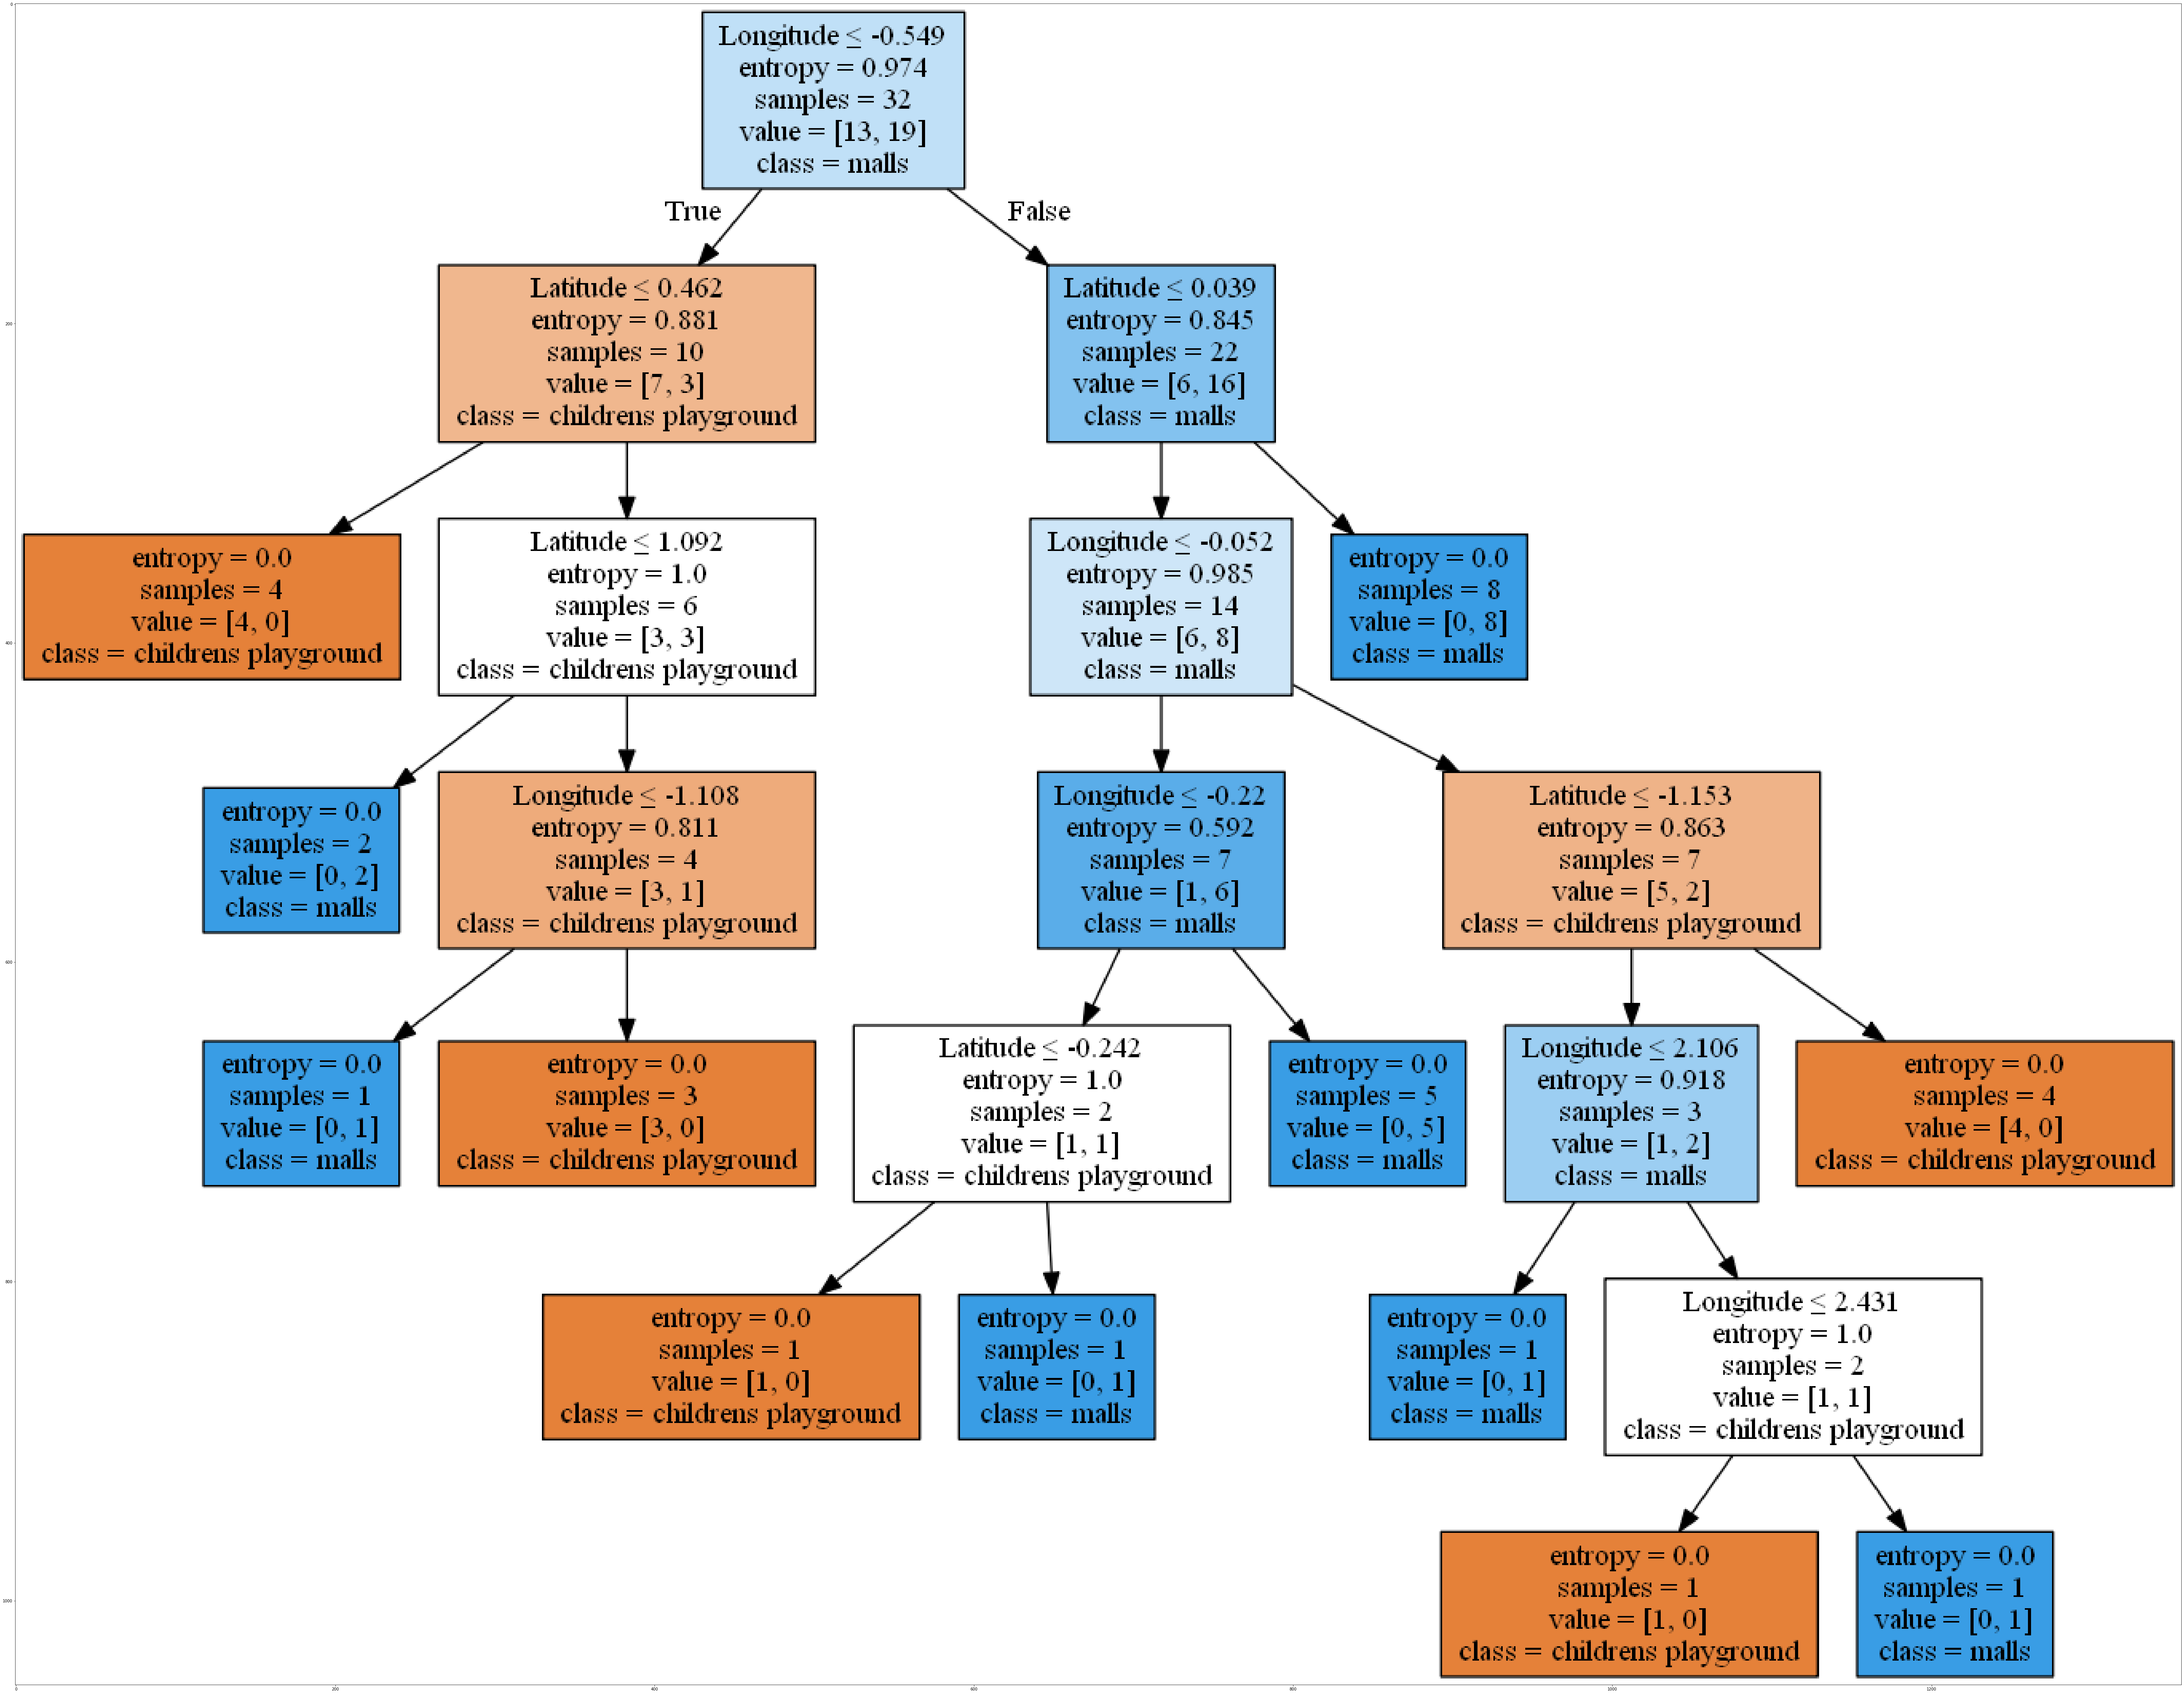

In [127]:
dot_data = StringIO()
filename_2 = "tree_2.png"
featureNames_2 = df_shch_2.columns[0:2]
out=tree.export_graphviz(Tree_2,feature_names=featureNames_2, out_file=dot_data, class_names= np.unique(y_train_2), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename_2)
img = mpimg.imread(filename_2)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [128]:
# SVM method

from sklearn import svm
clf_2 = svm.SVC(kernel='rbf')
clf_2.fit(X_train_2, y_train_2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [129]:
mat_hat_2 = clf_2.predict(X_test_2)
print("SVM Accuracy_test: ", metrics.accuracy_score(y_test_2, mat_hat_2).round(3))
mat_hat_2

SVM Accuracy_test:  1.0


array(['malls'], dtype=object)

In [130]:
# Logistic Regression method

from sklearn.linear_model import LogisticRegression
LR_2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_2,y_train_2)
LR_2

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
lr_hat_2 = LR_2.predict(X_test_2)
print("LogRess Accuracy_test: ", metrics.accuracy_score(y_test_2, lr_hat_2).round(3))
lr_hat_2

LogRess Accuracy_test:  1.0


array(['malls'], dtype=object)

In [132]:
# evaluating the accuracy of the solution

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [133]:
knn_hat_2 = neigh_2.predict(X_test_2)

print('jaccard_similarity_score:',jaccard_similarity_score(y_test_2, knn_hat_2).round(2))
print('f1_score:',f1_score(y_test_2, knn_hat_2, average='weighted').round(2)) 

jaccard_similarity_score: 1.0
f1_score: 1.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [134]:
Tree_hat_2 = Tree_2.predict(X_test_2)

print('jaccard_similarity_score:',jaccard_similarity_score(y_test_2, Tree_hat_2).round(2))
print('f1_score:',f1_score(y_test_2, Tree_hat_2, average='weighted').round(2)) 

jaccard_similarity_score: 0.0
f1_score: 0.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [135]:
mat_hat_2 = clf_2.predict(X_test_2)


print('jaccard_similarity_score:',jaccard_similarity_score(y_test_2, mat_hat_2).round(2))
print('f1_score:',f1_score(y_test_2, mat_hat_2, average='weighted').round(2)) 

jaccard_similarity_score: 1.0
f1_score: 1.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [136]:
lr_hat_2 = LR_2.predict(X_test_2)
lr_hat_nom_2 = LR_2.predict_proba(X_test_2)
#print(lr_hat_nom_2)


print('jaccard_similarity_score:',jaccard_similarity_score(y_test_2, lr_hat_2).round(2))
print('f1_score:',f1_score(y_test_2, lr_hat_2, average='weighted').round(2))
#print('log_loss:',log_loss(y_test_2, lr_hat_nom_2).round(2))

jaccard_similarity_score: 1.0
f1_score: 1.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Calculation results for option a

| Algorithm          | Jaccard | F1-score |
|--------------------|---------|----------|
| KNN                | 1.00    | 1.00     |
| Decision Tree      | 0.00    | 0.00     |
| SVM                | 1.00    | 1.00     |
| LogisticRegression | 1.00    | 1.00     |

### 2.2 Calculated cases B

In [137]:
df_shch_3 = df_chpl_shch.append([df_shop_shch, df_kind_shch], ignore_index = True)
df_shch_3['Class'].value_counts()

kindergarten            47
malls                   19
childrens playground    13
Name: Class, dtype: int64

In [138]:
df_shch_3.drop(['Name', 'Address'], axis = 1,inplace=True)
df_shch_3 = df_shch_3.append([df_qst], ignore_index = True)
df_shch_3.shape

(80, 3)

In [139]:
# city maps with markers for kindergartens, playgrounds and shopping centers

map_json = r'5_map_Shchelkovo.geojson'
zoom = 12
lat_city = lat_shch
lng_city = lng_shch
map_sum_shch_3 = folium.Map(location=[lat_city, lng_city], zoom_start=zoom)

map_sum_shch_3.choropleth(
    geo_data=map_json,        
    fill_color='green', 
    fill_opacity=0.5, 
    line_opacity=0.2,)

for lat, lng in zip(df_kind_shch['Latitude'], df_kind_shch['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_shch_3)
        
for lat, lng in zip(df_chpl_shch['Latitude'], df_chpl_shch['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_shch_3)    
        
for lat, lng in zip(df_shop_shch['Latitude'], df_shop_shch['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_shch_3)

for lat, lng in zip(df_qst['Latitude'], df_qst['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.8,
        parse_html=False).add_to(map_sum_shch_3)    
    
display(map_sum_shch_3)

In [140]:
map_sum_shch_3.save('map_sum_shch_3.html')

In [141]:
X_3 = df_shch_3[['Latitude', 'Longitude']]
X_3 = preprocessing.StandardScaler().fit(X_3).transform(X_3)

In [142]:
# preparing train and test data

X_train_3 = X_3[:-1]

In [143]:
X_test_3 = X_3[-1:]
X_test_3

array([[-0.4085637 , -0.11437325]])

In [144]:
y_train_3 = df_shch_3['Class'].values[:-1]

In [145]:
y_test_3 = df_shch_3['Class'].values[-1:]
y_test_3

array(['malls'], dtype=object)

In [146]:
# KNN method

Ks = 11
mean_acc = np.zeros((Ks-1))
mean_acc_train = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh_3 = KNeighborsClassifier(n_neighbors = n).fit(X_train_3,y_train_3)
    neigh_hat_3=neigh_3.predict(X_test_3)
    neigh_hat_train_3 = neigh_3.predict(X_train_3)
    mean_acc[n-1] = metrics.accuracy_score(y_test_3, neigh_hat_3)
    mean_acc_train[n-1] = metrics.accuracy_score(y_train_3, neigh_hat_train_3)
    
print("Train set Accuracy: ", mean_acc_train.round(3))
print(" Test set Accuracy: ", mean_acc.round(3))

Train set Accuracy:  [1.    0.709 0.734 0.722 0.709 0.658 0.62  0.608 0.684 0.646]
 Test set Accuracy:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [147]:
# Decision Tree method

Tree_3 = DecisionTreeClassifier(criterion="entropy")
Tree_3.fit(X_train_3,y_train_3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
pred_Tree_3 = Tree_3.predict(X_test_3)
print("DecisionTrees's Accuracy_test: ", metrics.accuracy_score(y_test_3, pred_Tree_3).round(3))
pred_Tree_3

DecisionTrees's Accuracy_test:  0.0


array(['kindergarten'], dtype=object)

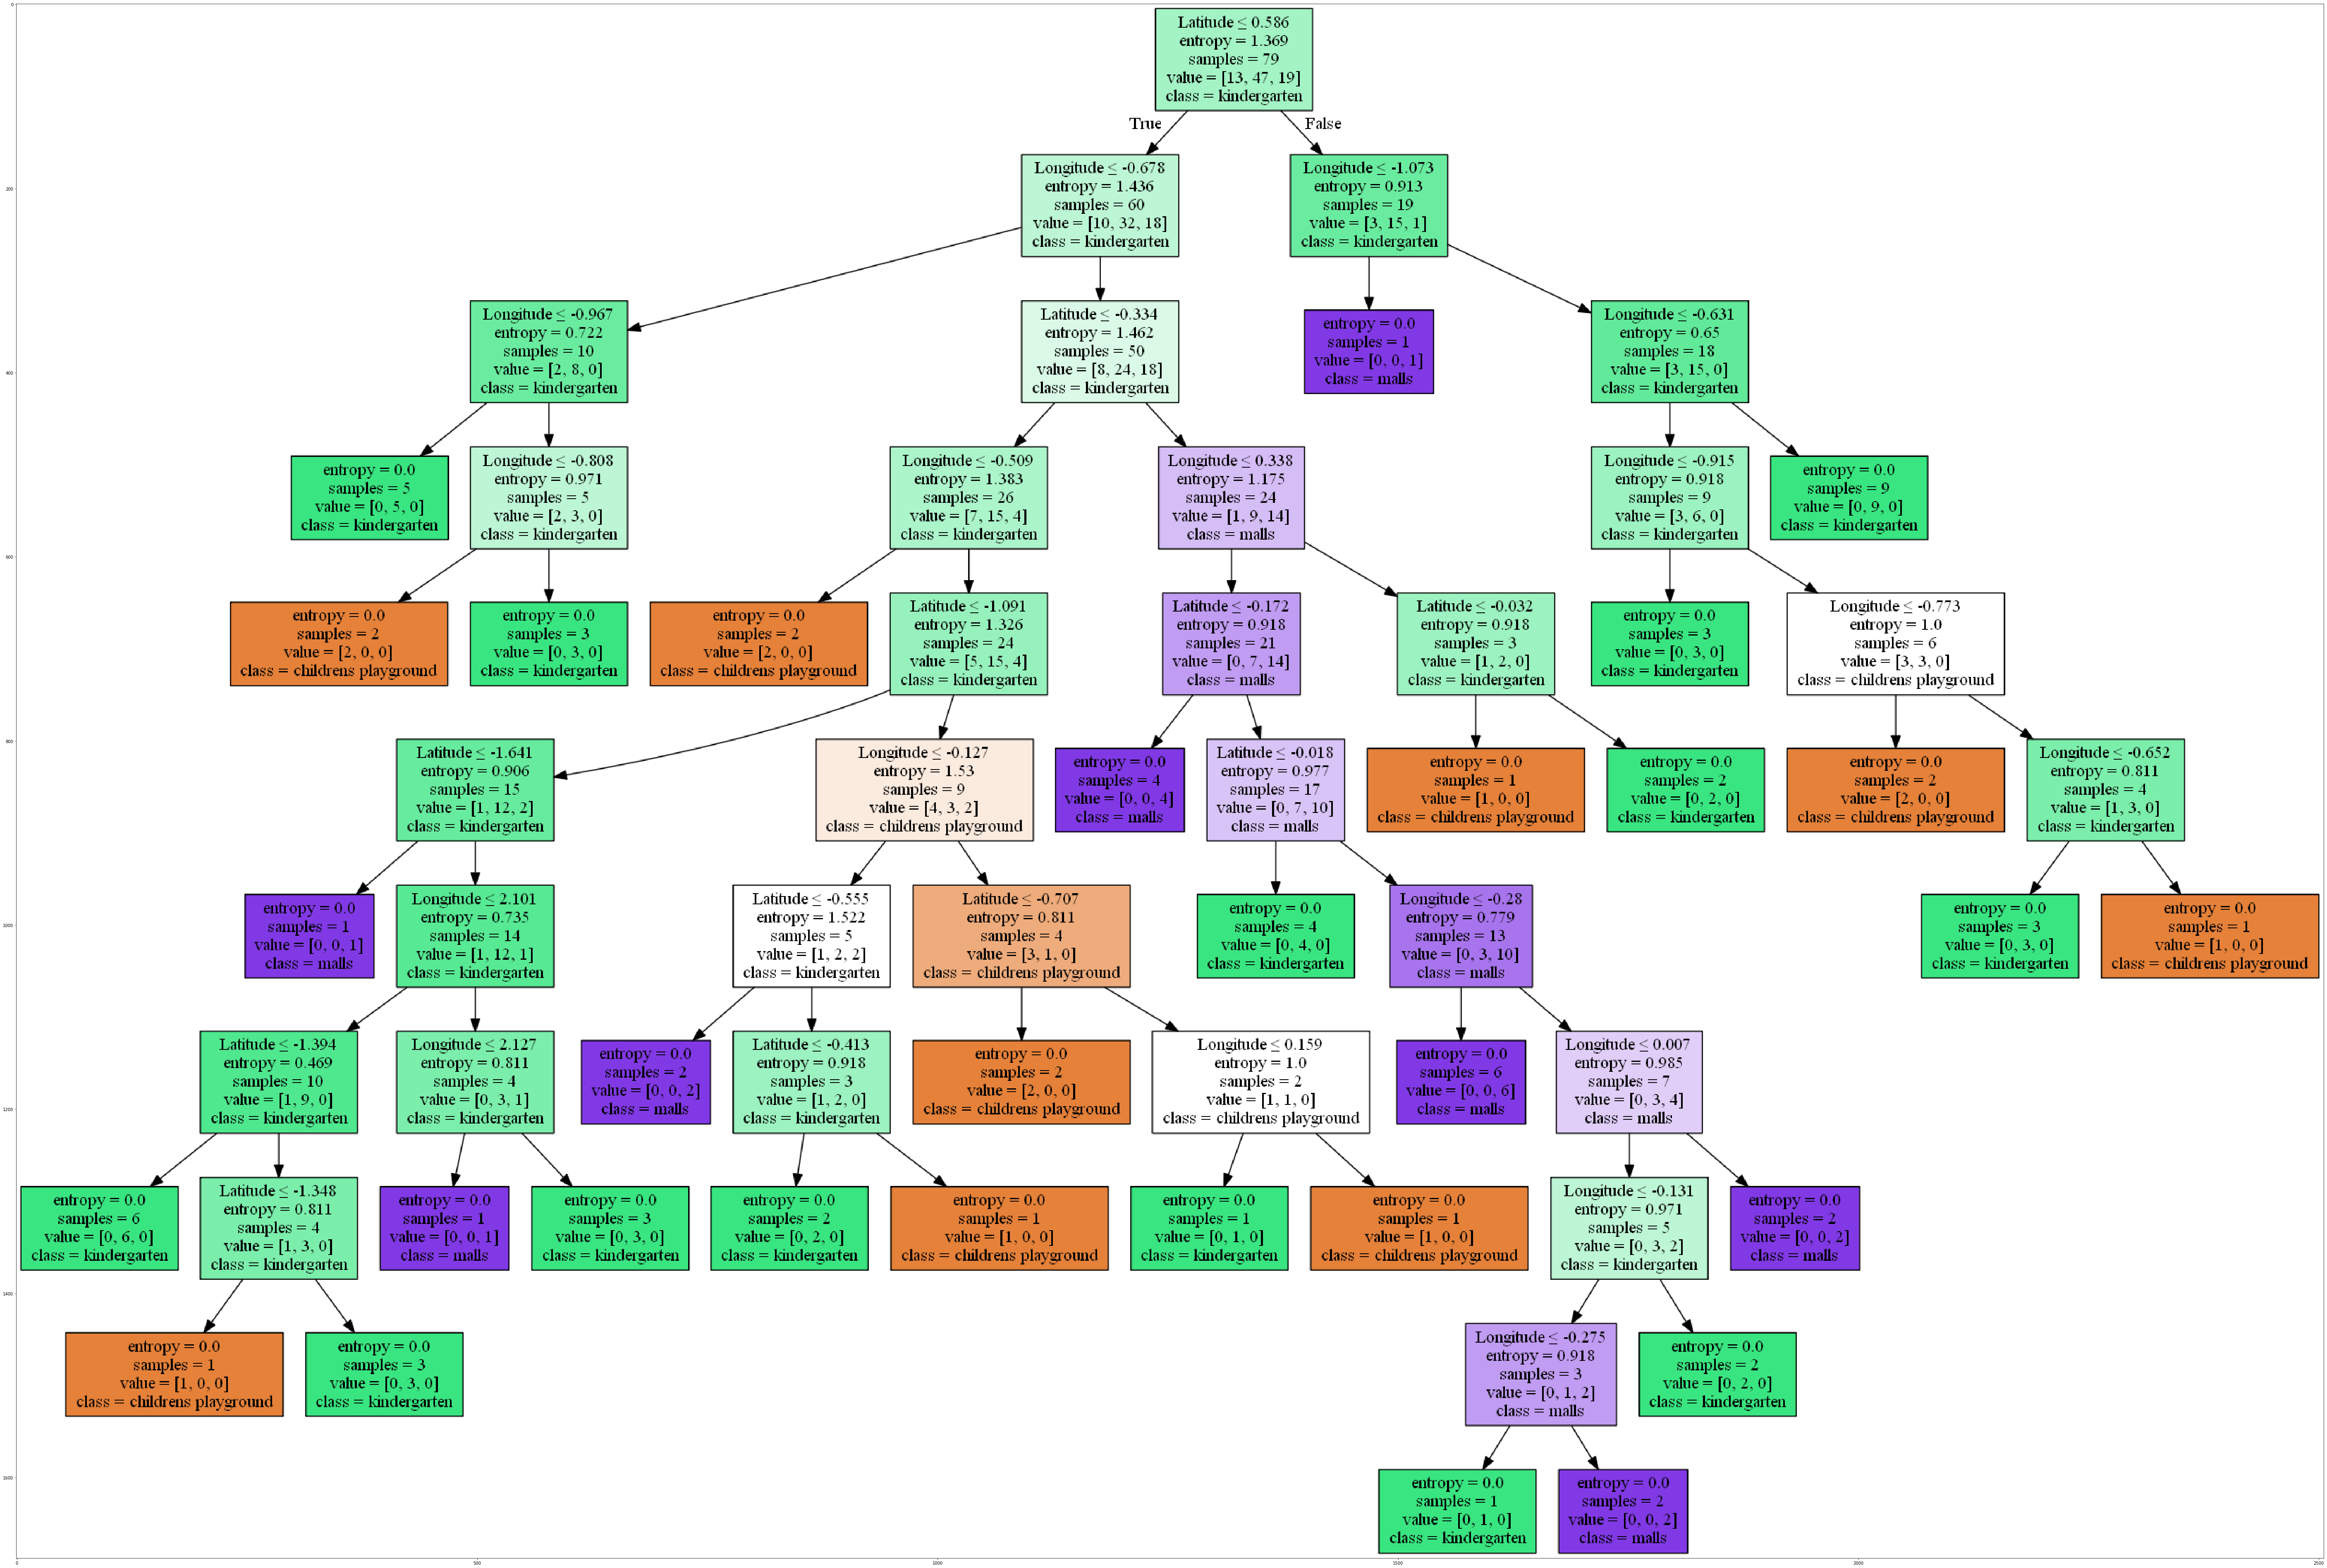

In [149]:
# displaying the decision tree

dot_data = StringIO()
filename_3 = "tree_3.png"
featureNames_3 = df_shch_3.columns[0:2]
out_3=tree.export_graphviz(Tree_3,feature_names=featureNames_3, out_file=dot_data, class_names= np.unique(y_train_3), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename_3)
img = mpimg.imread(filename_3)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [150]:
# SVM method

clf_3 = svm.SVC(kernel='rbf')
clf_3.fit(X_train_3, y_train_3)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
mat_hat_3 = clf_3.predict(X_test_3)
print("SVM Accuracy_test: ", metrics.accuracy_score(y_test_3, mat_hat_3).round(3))
mat_hat_3

SVM Accuracy_test:  0.0


array(['kindergarten'], dtype=object)

In [152]:
# Logistic Regression method

LR_3 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_3,y_train_3)
LR_3

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
lr_hat_3 = LR_3.predict(X_test_3)
print("LogRess Accuracy_test: ", metrics.accuracy_score(y_test_3, lr_hat_3).round(3))
lr_hat_3

LogRess Accuracy_test:  0.0


array(['kindergarten'], dtype=object)

In [154]:
# evaluating the accuracy of the solution

knn_hat_3 = neigh_3.predict(X_test_3)

print('jaccard_similarity_score:',jaccard_similarity_score(y_test_3, knn_hat_3).round(2))
print('f1_score:',f1_score(y_test_3, knn_hat_3, average='weighted').round(2)) 

jaccard_similarity_score: 1.0
f1_score: 1.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [155]:
Tree_hat_3 = Tree_3.predict(X_test_3)

print('jaccard_similarity_score:',jaccard_similarity_score(y_test_3, Tree_hat_3).round(2))
print('f1_score:',f1_score(y_test_3, Tree_hat_3, average='weighted').round(2)) 

jaccard_similarity_score: 0.0
f1_score: 0.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [156]:
mat_hat_3 = clf_3.predict(X_test_3)

print('jaccard_similarity_score:',jaccard_similarity_score(y_test_3, mat_hat_3).round(2))
print('f1_score:',f1_score(y_test_3, mat_hat_3, average='weighted').round(2))

jaccard_similarity_score: 0.0
f1_score: 0.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [157]:
lr_hat_3 = LR_3.predict(X_test_3)
lr_hat_nom_3 = LR_3.predict_proba(X_test_3)
#print(lr_hat_nom_3)

print('jaccard_similarity_score:',jaccard_similarity_score(y_test_3, lr_hat_3).round(2))
print('f1_score:',f1_score(y_test_3, lr_hat_3, average='weighted').round(2))
#print('log_loss:',log_loss(y_test_3, lr_hat_nom_3).round(2))

jaccard_similarity_score: 0.0
f1_score: 0.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Calculation results for option b

| Algorithm          | Jaccard | F1-score |
|--------------------|---------|----------|
| KNN                | 1.00    | 1.00     |
| Decision Tree      | 0.00    | 0.00     |
| SVM                | 0.00    | 0.00     |
| LogisticRegression | 0.00    | 0.00     |

### 2.3 Calculated cases C

In [158]:
df_train_2 = df_chpl_train.append([df_shop_train], ignore_index = True)
df_train_2.drop(['Name', 'Address'], axis = 1,inplace=True)
df_train_2

Latitude  Longitude                 Class
0    55.905024  37.861536  childrens playground
1    55.940946  37.841057  childrens playground
2    55.928333  37.882403  childrens playground
3    55.914352  37.866729  childrens playground
4    55.917884  37.821324  childrens playground
..         ...        ...                   ...
156  55.970423  37.933921                 malls
157  55.968493  37.901887                 malls
158  55.968333  37.902544                 malls
159  55.972952  37.902788                 malls
160  55.972952  37.902788                 malls

[161 rows x 3 columns]

In [159]:
# preparing train and test data

X_sum_train_2 = df_train_2[['Latitude', 'Longitude']]
X_sum_train_2 = preprocessing.StandardScaler().fit(X_sum_train_2).transform(X_sum_train_2)

In [160]:
y_sum_train_2 = df_train_2['Class']

In [161]:
X_sum_test_2 = X_2
y_sum_test_2 = df_shch_2['Class']

In [162]:
# city maps with markers for playgrounds and shopping centers in Korolyov, Mitishchi, Fryazino, Ivanteevka

map_json = r'5_map_AREA.geojson'
zoom = 12
lat_city = lat_shch
lng_city = lng_shch
map_sum_2 = folium.Map(location=[lat_city, lng_city], zoom_start=zoom)

map_sum_2.choropleth(
    geo_data=map_json,        
    fill_color='green', 
    fill_opacity=0.5, 
    line_opacity=0.2,)

for lat, lng in zip(df_chpl_train['Latitude'], df_chpl_train['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_2)    
        
for lat, lng in zip(df_shop_train['Latitude'], df_shop_train['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_2)

for lat, lng in zip(df_shch_2['Latitude'], df_shch_2['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.8,
        parse_html=False).add_to(map_sum_2)    
    
display(map_sum_2)

In [163]:
map_sum_2.save('map_sum_2.html')

In [164]:
# KNN method

Ks = 11
mean_acc = np.zeros((Ks-1))
mean_acc_train = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh_sum_2 = KNeighborsClassifier(n_neighbors = n).fit(X_sum_train_2,y_sum_train_2)
    neigh_sum_hat_2=neigh_sum_2.predict(X_sum_test_2)
    neigh_sum_hat_train_2 = neigh_sum_2.predict(X_sum_train_2)
    mean_acc[n-1] = metrics.accuracy_score(y_sum_test_2, neigh_sum_hat_2)
    mean_acc_train[n-1] = metrics.accuracy_score(y_sum_train_2, neigh_sum_hat_train_2)
    
print("Train set Accuracy: ", mean_acc_train.round(3))
print(" Test set Accuracy: ", mean_acc.round(3))

Train set Accuracy:  [1.    0.82  0.814 0.807 0.77  0.764 0.758 0.727 0.727 0.739]
 Test set Accuracy:  [0.424 0.455 0.545 0.576 0.576 0.576 0.576 0.576 0.545 0.515]


In [165]:
# Decision Tree method

Tree_sum_2 = DecisionTreeClassifier(criterion="entropy")
Tree_sum_2.fit(X_sum_train_2,y_sum_train_2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [166]:
pred_Tree_sum_2 = Tree_sum_2.predict(X_sum_test_2)
print("DecisionTrees's Accuracy_test: ", metrics.accuracy_score(y_sum_test_2, pred_Tree_sum_2).round(3))

DecisionTrees's Accuracy_test:  0.515


In [167]:
# SVM method

clf_sum_2 = svm.SVC(kernel='rbf')
clf_sum_2.fit(X_sum_train_2, y_sum_train_2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [168]:
mat_sum_hat_2 = clf_sum_2.predict(X_sum_test_2)
print("SVM Accuracy_test: ", metrics.accuracy_score(y_sum_test_2, mat_sum_hat_2).round(3))
mat_sum_hat_2

SVM Accuracy_test:  0.455


array(['malls', 'malls', 'malls', 'childrens playground',
       'childrens playground', 'malls', 'malls', 'malls',
       'childrens playground', 'malls', 'childrens playground', 'malls',
       'childrens playground', 'childrens playground', 'malls', 'malls',
       'childrens playground', 'malls', 'childrens playground', 'malls',
       'malls', 'childrens playground', 'malls', 'malls',
       'childrens playground', 'childrens playground',
       'childrens playground', 'childrens playground', 'malls',
       'childrens playground', 'malls', 'childrens playground', 'malls'],
      dtype=object)

In [169]:
# Logistic Regression method

LR_sum_2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_sum_train_2, y_sum_train_2)
LR_sum_2

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
lr_sum_hat_2 = LR_sum_2.predict(X_sum_test_2)
print("LogRess Accuracy_test: ", metrics.accuracy_score(y_sum_test_2, lr_sum_hat_2).round(3))
lr_sum_hat_2

LogRess Accuracy_test:  0.606


array(['malls', 'malls', 'malls', 'malls', 'malls', 'malls',
       'childrens playground', 'malls', 'malls', 'malls', 'malls',
       'malls', 'malls', 'malls', 'malls', 'malls', 'malls', 'malls',
       'malls', 'malls', 'malls', 'malls', 'childrens playground',
       'malls', 'malls', 'malls', 'malls', 'malls', 'malls', 'malls',
       'malls', 'malls', 'malls'], dtype=object)

In [171]:
# evaluating the accuracy of the solution

knn_sum_hat_2 = neigh_sum_2.predict(X_sum_test_2)

print('jaccard_similarity_score:',jaccard_similarity_score(y_sum_test_2, knn_sum_hat_2).round(2))
print('f1_score:',f1_score(y_sum_test_2, knn_sum_hat_2, average='weighted').round(2)) 

jaccard_similarity_score: 0.52
f1_score: 0.52


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [172]:
Tree_sum_hat_2 = Tree_sum_2.predict(X_sum_test_2)

print('jaccard_similarity_score:',jaccard_similarity_score(y_sum_test_2, Tree_sum_hat_2).round(2))
print('f1_score:',f1_score(y_sum_test_2, Tree_sum_hat_2, average='weighted').round(2))

jaccard_similarity_score: 0.52
f1_score: 0.51


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [173]:
mat_sum_hat_2 = clf_sum_2.predict(X_sum_test_2)

print('jaccard_similarity_score:',jaccard_similarity_score(y_sum_test_2, mat_sum_hat_2).round(2))
print('f1_score:',f1_score(y_sum_test_2, mat_sum_hat_2, average='weighted').round(2)) 

C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


jaccard_similarity_score: 0.45
f1_score: 0.46


In [174]:
lr_sum_hat_2 = LR_sum_2.predict(X_sum_test_2)
lr_sum_hat_nom_2 = LR_sum_2.predict_proba(X_sum_test_2)
#print(lr_sum_hat_nom_2)

print('jaccard_similarity_score:',jaccard_similarity_score(y_sum_test_2, lr_sum_hat_2).round(2))
print('f1_score:',f1_score(y_sum_test_2, lr_sum_hat_2, average='weighted').round(2))
#print('log_loss:',log_loss(y_sum_test_2, lr_sum_hat_nom_2).round(2))

jaccard_similarity_score: 0.61
f1_score: 0.5


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Calculation results for option c

| Algorithm          | Jaccard | F1-score |
|--------------------|---------|----------|
| KNN                | 0.52    | 0.52     |
| Decision Tree      | 0.42    | 0.42     |
| SVM                | 0.45    | 0.46     |
| LogisticRegression | 0.61    | 0.50     |

### 2.3 Calculated cases D

In [175]:
df_2_mod = df_chpl_train.append([df_shop_train, df_shch_2], ignore_index = True)
df_2_mod.drop(['Name', 'Address'], axis = 1,inplace=True)
df_2_mod = df_2_mod.append([df_qst], ignore_index = True)
df_2_mod

Latitude  Longitude                 Class
0    55.905024  37.861536  childrens playground
1    55.940946  37.841057  childrens playground
2    55.928333  37.882403  childrens playground
3    55.914352  37.866729  childrens playground
4    55.917884  37.821324  childrens playground
..         ...        ...                   ...
190  55.926586  37.983235                 malls
191  55.914067  37.992658                 malls
192  55.923431  37.991851                 malls
193  55.916471  37.994031                 malls
194  55.916471  37.994031                 malls

[195 rows x 3 columns]

In [176]:
# preparing train and test data

X_sum_2_mod = df_2_mod[['Latitude', 'Longitude']]
X_sum_2_mod = preprocessing.StandardScaler().fit(X_sum_2_mod).transform(X_sum_2_mod)

In [177]:
X_sum_train_2_mod = X_sum_2_mod[:-1]

In [178]:
X_sum_test_2_mod = X_2[-1:]
X_sum_test_2_mod

array([[-0.35920021, -0.04953719]])

In [179]:
y_sum_train_2_mod = df_2_mod['Class'].values[:-1]

In [180]:
y_sum_test_2_mod = df_2_mod['Class'].values[-1:]
y_sum_test_2_mod

array(['malls'], dtype=object)

In [181]:
# city maps with markers

map_json = r'5_map_AREA.geojson'
zoom = 12
lat_sum = 55.930655
lng_sum = 37.929000
map_sum_2_mod = folium.Map(location=[lat_city, lng_city], zoom_start=zoom)

map_sum_2_mod.choropleth(
    geo_data=map_json,        
    fill_color='green', 
    fill_opacity=0.5, 
    line_opacity=0.2,)

for lat, lng in zip(df_chpl_train['Latitude'], df_chpl_train['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_2_mod)    
        
for lat, lng in zip(df_shop_train['Latitude'], df_shop_train['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_2_mod)
    
for lat, lng in zip(df_chpl_shch['Latitude'], df_chpl_shch['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_2_mod)    
        
for lat, lng in zip(df_shop_shch['Latitude'], df_shop_shch['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        parse_html=False).add_to(map_sum_2_mod)

for lat, lng in zip(df_qst['Latitude'], df_qst['Longitude']):
    label = folium.Popup('{:6f}, {:6f}'.format(lat, lng), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.8,
        parse_html=False).add_to(map_sum_2_mod)   
    
display(map_sum_2_mod)

In [182]:
map_sum_2_mod.save('map_sum_2_mod.html')

In [183]:
# KNN method

Ks = 11
mean_acc = np.zeros((Ks-1))
mean_acc_train = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh_sum_2_mod = KNeighborsClassifier(n_neighbors = n).fit(X_sum_train_2_mod,y_sum_train_2_mod)
    neigh_sum_hat_2_mod=neigh_sum_2_mod.predict(X_sum_test_2_mod)
    neigh_sum_hat_train_2_mod = neigh_sum_2_mod.predict(X_sum_train_2_mod)
    mean_acc[n-1] = metrics.accuracy_score(y_sum_test_2_mod, neigh_sum_hat_2_mod)
    mean_acc_train[n-1] = metrics.accuracy_score(y_sum_train_2_mod, neigh_sum_hat_train_2_mod)
    
print("Train set Accuracy: ", mean_acc_train.round(3))
print(" Test set Accuracy: ", mean_acc.round(3))

Train set Accuracy:  [1.    0.83  0.799 0.804 0.773 0.758 0.737 0.737 0.716 0.727]
 Test set Accuracy:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [184]:
# Decision Tree method

Tree_sum_2_mod = DecisionTreeClassifier(criterion="entropy")
Tree_sum_2_mod.fit(X_sum_train_2_mod,y_sum_train_2_mod)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [185]:
pred_Tree_sum_2_mod = Tree_sum_2_mod.predict(X_sum_test_2_mod)
print("DecisionTrees's Accuracy_test: ", metrics.accuracy_score(y_sum_test_2_mod, pred_Tree_sum_2_mod).round(3))
pred_Tree_sum_2_mod

DecisionTrees's Accuracy_test:  0.0


array(['childrens playground'], dtype=object)

In [186]:
# SVM method

clf_sum_2_mod = svm.SVC(kernel='rbf')
clf_sum_2_mod.fit(X_sum_train_2_mod, y_sum_train_2_mod)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
mat_sum_hat_2_mod = clf_sum_2_mod.predict(X_sum_test_2_mod)
print("SVM Accuracy_test: ", metrics.accuracy_score(y_sum_test_2_mod, mat_sum_hat_2_mod).round(3))
mat_sum_hat_2_mod

SVM Accuracy_test:  1.0


array(['malls'], dtype=object)

In [188]:
# Logistic Regression method

LR_sum_2_mod = LogisticRegression(C=0.01, solver='liblinear').fit(X_sum_train_2_mod, y_sum_train_2_mod)
LR_sum_2_mod

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
lr_sum_hat_2_mod = LR_sum_2_mod.predict(X_sum_test_2_mod)
print("LogRess Accuracy_test: ", metrics.accuracy_score(y_sum_test_2_mod, lr_sum_hat_2_mod).round(3))
lr_sum_hat_2_mod

LogRess Accuracy_test:  1.0


array(['malls'], dtype=object)

In [190]:
# evaluating the accuracy of the solution

knn_sum_hat_2_mod = neigh_sum_2_mod.predict(X_sum_test_2_mod)

print('jaccard_similarity_score:',jaccard_similarity_score(y_sum_test_2_mod, knn_sum_hat_2_mod).round(2))
print('f1_score:',f1_score(y_sum_test_2_mod, knn_sum_hat_2_mod, average='weighted').round(2)) 

jaccard_similarity_score: 0.0
f1_score: 0.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [191]:
Tree_sum_hat_2_mod = Tree_sum_2_mod.predict(X_sum_test_2_mod)

print('jaccard_similarity_score:',jaccard_similarity_score(y_sum_test_2_mod, Tree_sum_hat_2_mod).round(2))
print('f1_score:',f1_score(y_sum_test_2_mod, Tree_sum_hat_2_mod, average='weighted').round(2))

jaccard_similarity_score: 0.0
f1_score: 0.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [192]:
mat_sum_hat_2_mod = clf_sum_2_mod.predict(X_sum_test_2_mod)

print('jaccard_similarity_score:',jaccard_similarity_score(y_sum_test_2_mod, mat_sum_hat_2_mod).round(2))
print('f1_score:',f1_score(y_sum_test_2_mod, mat_sum_hat_2_mod, average='weighted').round(2)) 

jaccard_similarity_score: 1.0
f1_score: 1.0


C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [193]:
lr_sum_hat_2_mod = LR_sum_2_mod.predict(X_sum_test_2_mod)
lr_sum_hat_nom_2_mod = LR_sum_2_mod.predict_proba(X_sum_test_2_mod)
#print(lr_sum_hat_nom_2)

print('jaccard_similarity_score:',jaccard_similarity_score(y_sum_test_2_mod, lr_sum_hat_2_mod).round(2))
print('f1_score:',f1_score(y_sum_test_2_mod, lr_sum_hat_2_mod, average='weighted').round(2))
#print('log_loss:',log_loss(y_sum_test_2, lr_sum_hat_nom_2).round(2))

C:\Users\tim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


jaccard_similarity_score: 1.0
f1_score: 1.0


Calculation results for option d

| Algorithm          | Jaccard | F1-score |
|--------------------|---------|----------|
| KNN                | 0.00    | 0.00     |
| Decision Tree      | 0.00    | 0.00     |
| SVM                | 1.00    | 1.00     |
| LogisticRegression | 1.00    | 1.00     |